In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import nibabel as nib
import seaborn as sns
import pandas as pd
from statannotations.Annotator import Annotator

In [2]:
def dice(A_binary, B_binary):
    AB = A_binary * B_binary
    DC = 2*(np.sum(AB))/(np.sum(A_binary) + np.sum(B_binary))
    return DC

# 3T Data test Dice

In [3]:
#subjects= ["sub-C010-ses-M0", "sub-C012-ses-M0", "sub-C015-ses-M0", "sub-MRS00-ses-M0", "sub-MRS15-ses-M0", "sub-MRS15-ses-M24", "sub-MRS18-ses-M0", "sub-MRS23-ses-M0", "sub-MRS23-ses-M24", "sub-nih003-ses-M0", "sub-nih009-ses-M0", "sub-nih017-ses-M0", "sub-nih021-ses-M0", "sub-nih037-ses-M0", "sub-nih042-ses-M0", "sub-nih043-ses-M0", "sub-nih045-ses-M0", "sub-nih051-ses-M0", "sub-nih052-ses-M0", "sub-nih054-ses-M0", "sub-nih056-ses-M0", "sub-nih067-ses-M0", "sub-nih073-ses-M0", "sub-nih075-ses-M0", "sub-nih084-ses-M0", "sub-nih087-ses-M0", "sub-nih089-ses-M0", "sub-nih092-ses-M0", "sub-nih100-ses-M0", "sub-nih101-ses-M0", "sub-nih110-ses-M0", "sub-nih112-ses-M0", "sub-nih117-ses-M0", "sub-nih120-ses-M0", "sub-nih134-ses-M0", "sub-nih136-ses-M0", "sub-nih144-ses-M0", "sub-nih147-ses-M0", "sub-nih149-ses-M0", "sub-nih155-ses-M0", "sub-nih173-ses-M0", "sub-nih179-ses-M0", "sub-nih183-ses-M0", "sub-nih194-ses-M0", "sub-nih195-ses-M0", "sub-nih199-ses-M0", "sub-P002-ses-M0", "sub-P016-ses-M0", "sub-P021-ses-M0", "sub-P037-ses-M0", "sub-P038-ses-M0", "sub-P044-ses-M0", "sub-P046-ses-M0", "sub-P051-ses-M0", "sub-P058-ses-M0", "sub-P061-ses-M0", "sub-P063-ses-M0", "sub-P066-ses-M0", "sub-P069-ses-M0", "sub-P077-ses-M0", "sub-P079-ses-M0", "sub-P080-ses-M0", "sub-P084-ses-M0", "sub-P085-ses-M0", "sub-P094-ses-M0", "sub-P109-ses-M0", "sub-P120-ses-M0", "sub-P126-ses-M0", "sub-P130-ses-M0", "sub-P132-ses-M0", "sub-P133-ses-M0", "sub-P136-ses-M0", "sub-P149-ses-M0", "sub-P165-ses-M0", "sub-P175-ses-M0", "sub-P178-ses-M0", "sub-P183-ses-M0", "sub-P189-ses-M0", "sub-P199-ses-M0", "sub-P249-ses-M0"]
subjects= ["sub-MRS00-ses-M0", "sub-MRS15-ses-M0", "sub-MRS15-ses-M24", "sub-MRS18-ses-M0", "sub-MRS23-ses-M0", "sub-MRS23-ses-M24", "sub-nih003-ses-M0", "sub-nih009-ses-M0", "sub-nih021-ses-M0", "sub-nih037-ses-M0", "sub-nih042-ses-M0", "sub-nih043-ses-M0", "sub-nih045-ses-M0", "sub-nih051-ses-M0", "sub-nih054-ses-M0",  "sub-nih067-ses-M0", "sub-nih073-ses-M0", "sub-nih075-ses-M0", "sub-nih089-ses-M0", "sub-nih092-ses-M0",  "sub-nih101-ses-M0", "sub-nih110-ses-M0", "sub-nih112-ses-M0", "sub-nih117-ses-M0", "sub-nih120-ses-M0", "sub-nih134-ses-M0", "sub-nih136-ses-M0", "sub-nih144-ses-M0", "sub-nih147-ses-M0", "sub-nih149-ses-M0", "sub-nih173-ses-M0", "sub-nih179-ses-M0", "sub-nih183-ses-M0", "sub-nih194-ses-M0", "sub-nih195-ses-M0", "sub-nih199-ses-M0", "sub-P002-ses-M0", "sub-P016-ses-M0", "sub-P021-ses-M0", "sub-P037-ses-M0", "sub-P038-ses-M0", "sub-P044-ses-M0", "sub-P046-ses-M0", "sub-P051-ses-M0", "sub-P058-ses-M0", "sub-P061-ses-M0", "sub-P063-ses-M0", "sub-P066-ses-M0", "sub-P069-ses-M0",  "sub-P079-ses-M0", "sub-P080-ses-M0", "sub-P084-ses-M0", "sub-P085-ses-M0", "sub-P094-ses-M0", "sub-P109-ses-M0", "sub-P120-ses-M0",  "sub-P130-ses-M0", "sub-P132-ses-M0", "sub-P149-ses-M0", "sub-P165-ses-M0", "sub-P175-ses-M0", "sub-P178-ses-M0", "sub-P183-ses-M0",  "sub-P199-ses-M0", "sub-P249-ses-M0"]
#subjects= ["sub-C010-ses-M0","sub-C012-ses-M0","sub-C015-ses-M0","sub-nih017-ses-M0","sub-nih052-ses-M0","sub-nih056-ses-M0","sub-nih084-ses-M0","sub-nih087-ses-M0","sub-nih100-ses-M0","sub-nih155-ses-M0","sub-P077-ses-M0","sub-P126-ses-M0","sub-P133-ses-M0","sub-P136-ses-M0","sub-P189-ses-M0"]

In [298]:
df=[]
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
for subject in subjects: 
    gt_lesion_data= nib.load(path_database + '403/GT_sc/'+ subject +'_UNIT1_GT.nii.gz')
    gt_lesion = np.array(gt_lesion_data.get_fdata())
    
    gt_lesion_data_brain= nib.load(path_database + '401/sc_lesion/'+ subject +'_UNIT1_GT.nii.gz')
    gt_lesion_brain = np.array(gt_lesion_data_brain.get_fdata())
    th, gt_lesion_brain = cv2.threshold(gt_lesion_brain, 0.5, 1, cv2.THRESH_BINARY)

    pred_lesion_data_single_fov= nib.load(path_database + '401/sc_lesion/'+ subject +'_UNIT1_algo-3-fov.nii.gz')
    pred_lesion_single_fov = np.array(pred_lesion_data_single_fov.get_fdata())
    th, pred_lesion_single_fov = cv2.threshold(pred_lesion_single_fov, 0.5, 1, cv2.THRESH_BINARY)
    
    pred_lesion_data_algo1 = nib.load(path_database + '403/masks_cropped/'+ subject +'_UNIT1_algo-1.nii.gz')
    pred_lesion_algo1 = np.array(pred_lesion_data_algo1.get_fdata())

    pred_lesion_data_single = nib.load(path_database + '403/masks_cropped/'+ subject +'_UNIT1_algo-3-singleclass.nii.gz')
    pred_lesion_single = np.array(pred_lesion_data_single.get_fdata())

    pred_lesion_data_multi = nib.load(path_database + '405/masks_cropped/lesions/'+ subject +'_UNIT1_algo-3-multiclass.nii.gz')
    pred_lesion_multi = np.array(pred_lesion_data_multi.get_fdata())
    
    dice_lesion_algo1 = dice(gt_lesion,pred_lesion_algo1)
    dice_lesion_single = dice(gt_lesion,pred_lesion_single)
    dice_lesion_single_fov = dice(gt_lesion_brain,pred_lesion_single_fov)
    dice_lesion_multi = dice(gt_lesion,pred_lesion_multi)
    
    d = {'subject': subject,'dice_lesion_algo1':dice_lesion_algo1,'dice_lesion_single':dice_lesion_single,
         'dice_lesion_multi':dice_lesion_multi}
    df.append(d)
data=pd.DataFrame(data=df)
data  

,subject,dice_lesion_algo1,dice_lesion_single,dice_lesion_multi
0,sub-MRS00-ses-M0,0.272853,0.635678,0.548431
1,sub-MRS15-ses-M0,0.090409,0.721868,0.656020
2,sub-MRS15-ses-M24,0.122134,0.763158,0.661224
3,sub-MRS18-ses-M0,0.401709,0.517857,0.175824
4,sub-MRS23-ses-M0,0.077063,0.746186,0.537415
...,...,...,...,...
60,sub-P175-ses-M0,0.834286,0.846626,0.677165
61,sub-P178-ses-M0,0.635838,0.262948,0.173913
62,sub-P183-ses-M0,0.681733,0.550588,0.510309
63,sub-P199-ses-M0,0.849968,0.846255,0.799429


In [343]:
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
#data.to_excel(path_database + "dices_3T.xlsx") 
data = pd.read_excel(path_database + "dices_3T.xlsx")
data

,Unnamed: 0,subject,dice_lesion_algo1,dice_lesion_single,dice_lesion_multi
0,0,sub-MRS00-ses-M0,0.272853,0.635678,0.548431
1,1,sub-MRS15-ses-M0,0.090409,0.721868,0.656020
2,2,sub-MRS15-ses-M24,0.122134,0.763158,0.661224
3,3,sub-MRS18-ses-M0,0.401709,0.517857,0.175824
4,4,sub-MRS23-ses-M0,0.077063,0.746186,0.537415
...,...,...,...,...,...
60,60,sub-P175-ses-M0,0.834286,0.846626,0.677165
61,61,sub-P178-ses-M0,0.635838,0.262948,0.173913
62,62,sub-P183-ses-M0,0.681733,0.550588,0.510309
63,63,sub-P199-ses-M0,0.849968,0.846255,0.799429


dice algo 1 mean: 0.5766179279972311     dice STD: 0.23888111583666977
dice algo 2 single-class mean: 0.6694275795193678     dice STD: 0.20733123150750932
dice algo 2 multi-class mean: 0.55761346815888     dice STD: 0.21561584859352326
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

dice_lesion_algo1 vs. dice_lesion_single: Wilcoxon test (paired samples), P_val:1.100e-03 Stat=5.110e+02
dice_lesion_single vs. dice_lesion_multi: Wilcoxon test (paired samples), P_val:4.283e-10 Stat=8.600e+01
dice_lesion_algo1 vs. dice_lesion_multi: Wilcoxon test (paired samples), P_val:1.667e-01 Stat=8.060e+02


(<AxesSubplot:xlabel='Group', ylabel='Dice'>,
  <statannotations.Annotation.Annotation at 0x7f6d1c284c90>])

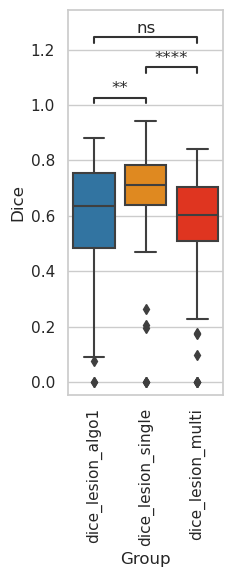

In [301]:
data = data
df_lesion_algo_1 = data.filter(['dice_lesion_algo1'], axis=1)
df_lesion_algo_1.insert(0, 'Group', 'dice_lesion_algo1')
df_lesion_algo_1.rename(columns={'dice_lesion_algo1': 'Dice'}, inplace=True)

df_lesion_mono = data.filter(['dice_lesion_single'], axis=1)
df_lesion_mono.insert(0, 'Group', 'dice_lesion_single')
df_lesion_mono.rename(columns={'dice_lesion_single': 'Dice'}, inplace=True)

df_lesion_mono_fov = data.filter(['dice_lesion_single_fov'], axis=1)
df_lesion_mono_fov.insert(0, 'Group', 'dice_lesion_single_fov')
df_lesion_mono_fov.rename(columns={'dice_lesion_single_fov': 'Dice'}, inplace=True)

df_lesion_multi = data.filter(['dice_lesion_multi'], axis=1)
df_lesion_multi.insert(0, 'Group', 'dice_lesion_multi')
df_lesion_multi.rename(columns={'dice_lesion_multi': 'Dice'}, inplace=True)

frames = [ df_lesion_algo_1, df_lesion_mono ,df_lesion_multi]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(2,5))
plt.xticks(rotation=90)
colores = ["#1f77b4", "#FF8C00", "#FF1C00"]
ax_gm = sns.boxplot(data=result_gm, x="Group", palette=colores, y="Dice")
print ("dice algo 1 mean:", np.mean(data["dice_lesion_algo1"]) ,"    dice STD:", np.std(data["dice_lesion_algo1"])) 
print ("dice algo 2 single-class mean:", np.mean(data["dice_lesion_single"]) ,"    dice STD:", np.std(data["dice_lesion_single"])) 
print ("dice algo 2 multi-class mean:", np.mean(data["dice_lesion_multi"]) ,"    dice STD:", np.std(data["dice_lesion_multi"])) 



pairs=[
           (("dice_lesion_algo1"), ("dice_lesion_single")),
           (("dice_lesion_algo1"), ("dice_lesion_multi")),
           (("dice_lesion_single"), ("dice_lesion_multi")) ]
annotator_csa_gm = Annotator(ax_gm, pairs, data=result_gm, x="Group", y="Dice")#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()


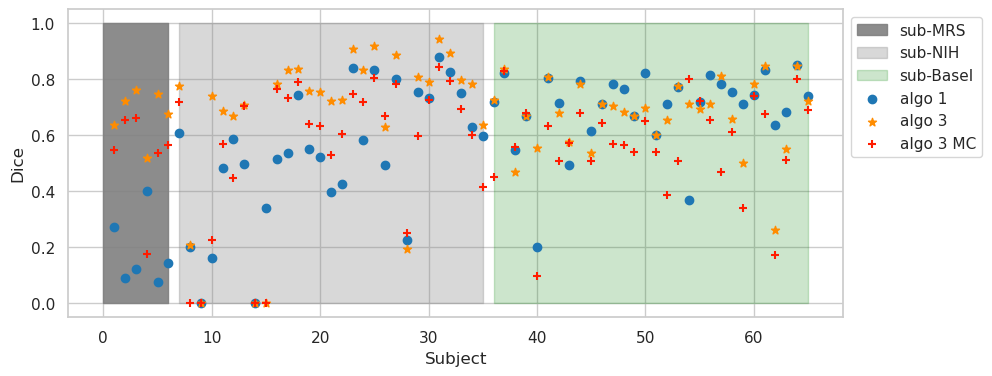

In [282]:
columna_1 = data["dice_lesion_algo1"]
columna_2 = data["dice_lesion_single"]
columna_3 = data["dice_lesion_multi"]

plt.figure(figsize=((10,4)))
plt.fill_between(range(0, 7), 0, 1, color='gray', alpha=0.9, label='sub-MRS')
plt.fill_between(range(7, 36), 0, 1, color='gray', alpha=0.3, label='sub-NIH')
plt.fill_between(range(36, 66), 0, 1, color='green', alpha=0.2, label='sub-Basel')
#plt.fill_between(range(6, 81), min(columna_1[:80]), max(columna_1[:80]), color='gray', alpha=0.2, label='sub-Basel')
plt.scatter(range(1, len(columna_1) + 1), columna_1, marker='o', color='#1f77b4', label='algo 1')
plt.scatter(range(1, len(columna_2) + 1), columna_2, marker='*', color='#FF8C00', label='algo 3')
plt.scatter(range(1, len(columna_3) + 1), columna_3, marker='+', color='#FF1C00', label='algo 3 MC')

#plt.title('UNIT1-den VS UNIT1-nonden')
plt.xlabel('Subject')
plt.ylabel('Dice')
#plt.legend(loc='best')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# 7T Data test Dice

In [8]:
subjects=["sub-MRS01_ses-M0","sub-MRS04_ses-M0","sub-MRS05_ses-M0","sub-MRS05_ses-M24","sub-MRS06_ses-M0","sub-MRS08_ses-M0","sub-MRS09_ses-M0","sub-MRS10_ses-M0","sub-MRS11_ses-M0","sub-MRS12_ses-M0","sub-MRS14_ses-M0","sub-MRS14_ses-M24","sub-MRS16_ses-M0"]
#subjects=["sub-MRS02_ses-M0","sub-MRS07_ses-M0","sub-MRS07_ses-M24","sub-MRS15_ses-M0","sub-MRS15_ses-M24",,"sub-MRS17_ses-M0"
df=[]
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/7T/'
for subject in subjects: 
    gt_lesion_data= nib.load(path_database + 'GT_iso/' + subject +'_UNIT1_desc-rater1_label-lesion_seg.nii.gz')
    gt_lesion = np.array(gt_lesion_data.get_fdata())
    
    pred_lesion_data_algo1 = nib.load(path_database + 'algo-1_iso/'+ subject +'_UNIT1_label-lesion_algo1_reg.nii.gz')
    pred_lesion_algo1 = np.array(pred_lesion_data_algo1.get_fdata())

    pred_lesion_data_single = nib.load(path_database + '403_iso/'+ subject +'_UNIT1_algo-3-singleclass.nii.gz')
    pred_lesion_single = np.array(pred_lesion_data_single.get_fdata())

    pred_lesion_data_multi = nib.load(path_database + '405_iso/'+ subject +'_UNIT1_algo-3-multiclass.nii.gz')
    pred_lesion_multi = np.array(pred_lesion_data_multi.get_fdata())
    
    dice_lesion_algo1 = dice(gt_lesion,pred_lesion_algo1)
    dice_lesion_single = dice(gt_lesion,pred_lesion_single)
    dice_lesion_multi = dice(gt_lesion,pred_lesion_multi)
    
    d = {'subject': subject,'dice_lesion_algo1':dice_lesion_algo1,'dice_lesion_single':dice_lesion_single,
         'dice_lesion_multi':dice_lesion_multi}
    df.append(d)
data_iso=pd.DataFrame(data=df)
data_iso  

,subject,dice_lesion_algo1,dice_lesion_single,dice_lesion_multi
0,sub-MRS01_ses-M0,0.576490,0.787402,0.606452
1,sub-MRS04_ses-M0,0.245312,0.637191,0.485465
2,sub-MRS05_ses-M0,0.157846,0.237895,0.166852
3,sub-MRS05_ses-M24,0.167464,0.229508,0.108999
4,sub-MRS06_ses-M0,0.138391,0.356432,0.340871
5,sub-MRS08_ses-M0,0.000000,0.661111,0.428571
6,sub-MRS09_ses-M0,0.000000,0.590476,0.351145
7,sub-MRS10_ses-M0,0.398210,0.653846,0.462222
8,sub-MRS11_ses-M0,0.219887,0.626999,0.535012
9,sub-MRS12_ses-M0,0.383358,0.497479,0.142857


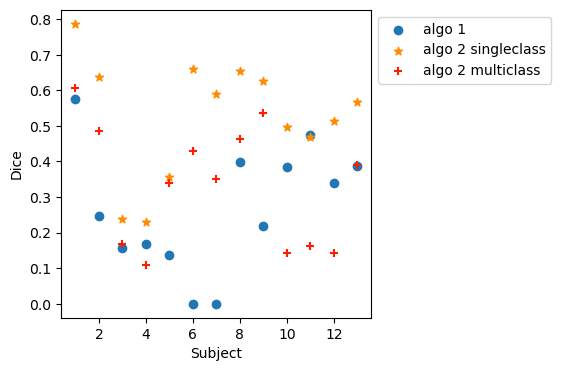

In [9]:
data=data_iso
columna_1 = data["dice_lesion_algo1"]
columna_2 = data["dice_lesion_single"]
columna_3 = data["dice_lesion_multi"]

plt.figure(figsize=((4,4)))
#plt.fill_between(range(0, 7), 0, 1, color='gray', alpha=0.9, label='sub-MRS')
#plt.fill_between(range(7, 36), 0, 1, color='gray', alpha=0.3, label='sub-NIH')
#plt.fill_between(range(36, 66), 0, 1, color='green', alpha=0.2, label='sub-Basel')
#plt.fill_between(range(6, 81), min(columna_1[:80]), max(columna_1[:80]), color='gray', alpha=0.2, label='sub-Basel')
plt.scatter(range(1, len(columna_1) + 1), columna_1, marker='o', color='#1f77b4', label='algo 1')
plt.scatter(range(1, len(columna_2) + 1), columna_2, marker='*', color='#FF8C00', label='algo 2 singleclass')
plt.scatter(range(1, len(columna_3) + 1), columna_3, marker='+', color='#FF1C00', label='algo 2 multiclass')

#plt.title('UNIT1-den VS UNIT1-nonden')
plt.xlabel('Subject')
plt.ylabel('Dice')
#plt.legend(loc='best')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


dice algo 1 mean: 0.2683784682890462     dice STD: 0.1693570504836527
dice algo 2 single-class mean: 0.5250881632404787     dice STD: 0.16061272489564407
dice algo 2 multi-class mean: 0.33246463383992136     dice STD: 0.1636434689599618


'\npairs=[\n           (("dice algo 1"), ("dice algo 2 single")),\n           (("dice algo 1"), ("dice algo 2 MC")),\n           (("dice algo 2 MC"), ("dice algo 2 single")) ]\nannotator_csa_gm = Annotator(ax_gm, pairs, data=result_gm, x="Group", y="Dice")#, order=order)\nannotator_csa_gm.configure(test=\'t-test_paired\', text_format=\'star\', loc=\'inside\').apply_test()\nannotator_csa_gm.apply_and_annotate()\n'

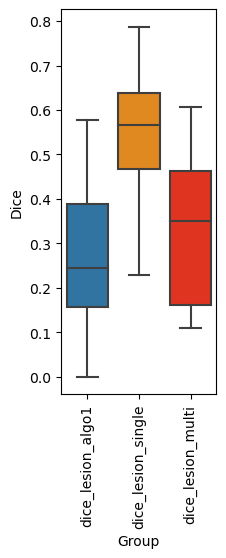

In [10]:
data = data_iso
df_lesion_algo_1 = data.filter(['dice_lesion_algo1'], axis=1)
df_lesion_algo_1.insert(0, 'Group', 'dice_lesion_algo1')
df_lesion_algo_1.rename(columns={'dice_lesion_algo1': 'Dice'}, inplace=True)

df_lesion_mono = data.filter(['dice_lesion_single'], axis=1)
df_lesion_mono.insert(0, 'Group', 'dice_lesion_single')
df_lesion_mono.rename(columns={'dice_lesion_single': 'Dice'}, inplace=True)

df_lesion_multi = data.filter(['dice_lesion_multi'], axis=1)
df_lesion_multi.insert(0, 'Group', 'dice_lesion_multi')
df_lesion_multi.rename(columns={'dice_lesion_multi': 'Dice'}, inplace=True)

frames = [ df_lesion_algo_1, df_lesion_mono ,df_lesion_multi]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(2,5))
plt.xticks(rotation=90)
colores = ["#1f77b4", "#FF8C00", "#FF1C00"]
ax_gm = sns.boxplot(data=result_gm, x="Group", palette=colores, y="Dice")
print ("dice algo 1 mean:", np.mean(data["dice_lesion_algo1"]) ,"    dice STD:", np.std(data["dice_lesion_algo1"])) 
print ("dice algo 2 single-class mean:", np.mean(data["dice_lesion_single"]) ,"    dice STD:", np.std(data["dice_lesion_single"])) 
print ("dice algo 2 multi-class mean:", np.mean(data["dice_lesion_multi"]) ,"    dice STD:", np.std(data["dice_lesion_multi"])) 


"""
pairs=[
           (("dice algo 1"), ("dice algo 2 single")),
           (("dice algo 1"), ("dice algo 2 MC")),
           (("dice algo 2 MC"), ("dice algo 2 single")) ]
annotator_csa_gm = Annotator(ax_gm, pairs, data=result_gm, x="Group", y="Dice")#, order=order)
annotator_csa_gm.configure(test='t-test_paired', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
"""

In [11]:
subjects=["sub-MRS00_ses-M0_run-1", "sub-MRS00_ses-M24_run-1", "sub-MRS00_ses-M24_run-2", "sub-MRS01_ses-M0_run-1", "sub-MRS01_ses-M0_run-2","sub-MRS03_ses-M0_run-1", "sub-MRS03_ses-M0_run-2", "sub-MRS04_ses-M0_run-1", "sub-MRS04_ses-M0_run-2", "sub-MRS04_ses-M24_run-1", "sub-MRS05_ses-M0_run-1", "sub-MRS05_ses-M0_run-2", "sub-MRS05_ses-M24_run-1", "sub-MRS05_ses-M24_run-2", "sub-MRS06_ses-M0_run-1", "sub-MRS06_ses-M0_run-2", "sub-MRS08_ses-M0_run-1", "sub-MRS08_ses-M0_run-2", "sub-MRS09_ses-M0_run-1", "sub-MRS09_ses-M0_run-2", "sub-MRS10_ses-M0_run-1", "sub-MRS10_ses-M0_run-2", "sub-MRS11_ses-M0_run-1", "sub-MRS11_ses-M0_run-2", "sub-MRS11_ses-M24_run-1", "sub-MRS11_ses-M24_run-2", "sub-MRS12_ses-M0_run-1", "sub-MRS12_ses-M0_run-2", "sub-MRS13_ses-M0_run-1", "sub-MRS14_ses-M0_run-1", "sub-MRS14_ses-M0_run-2", "sub-MRS14_ses-M24_run-1", "sub-MRS14_ses-M24_run-2", "sub-MRS16_ses-M0_run-1", "sub-MRS16_ses-M0_run-2", "sub-MRS18_ses-M0_run-1", "sub-MRS18_ses-M24_run-1"]
#subjects=["sub-MRS02_ses-M0_run-1", "sub-MRS07_ses-M0_run-1", "sub-MRS07_ses-M0_run-2", "sub-MRS07_ses-M24_run-1", "sub-MRS07_ses-M24_run-2", "sub-MRS15_ses-M0_run-1", "sub-MRS15_ses-M0_run-2", "sub-MRS15_ses-M24_run-1", "sub-MRS15_ses-M24_run-2",  "sub-MRS17_ses-M0_run-1", "sub-MRS17_ses-M0_run-2", "sub-MRS17_ses-M24_run-1", "sub-MRS18_ses-M0_run-2"
df=[]
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/7T/'
for subject in subjects: 
    gt_lesion_data= nib.load(path_database + 'GT_aniso/' + subject +'_UNIT1_desc-rater1_label-lesion_seg.nii.gz')
    gt_lesion = np.array(gt_lesion_data.get_fdata())
    
    pred_lesion_data_algo1 = nib.load(path_database + 'algo-1_aniso/'+ subject +'_UNIT1_label-lesion_algo1.nii.gz')
    pred_lesion_algo1 = np.array(pred_lesion_data_algo1.get_fdata())

    pred_lesion_data_single = nib.load(path_database + '403_aniso/lesions/'+ subject +'_UNIT1_algo-3-singleclass.nii.gz')
    pred_lesion_single = np.array(pred_lesion_data_single.get_fdata())

    pred_lesion_data_multi = nib.load(path_database + '405_aniso/lesions/'+ subject +'_UNIT1_algo-3-multiclass.nii.gz')
    pred_lesion_multi = np.array(pred_lesion_data_multi.get_fdata())
    
    dice_lesion_algo1 = dice(gt_lesion,pred_lesion_algo1)
    dice_lesion_single = dice(gt_lesion,pred_lesion_single)
    dice_lesion_multi = dice(gt_lesion,pred_lesion_multi)
    
    d = {'subject': subject,'dice_lesion_algo1':dice_lesion_algo1,'dice_lesion_single':dice_lesion_single,
         'dice_lesion_multi':dice_lesion_multi}
    df.append(d)
data_aniso=pd.DataFrame(data=df)
data_aniso  

,subject,dice_lesion_algo1,dice_lesion_single,dice_lesion_multi
0,sub-MRS00_ses-M0_run-1,0.508227,0.601405,0.454433
1,sub-MRS00_ses-M24_run-1,0.367181,0.483068,0.491018
2,sub-MRS00_ses-M24_run-2,0.405126,0.567731,0.686071
3,sub-MRS01_ses-M0_run-1,0.586035,0.779359,0.777778
4,sub-MRS01_ses-M0_run-2,0.600000,0.768696,0.739040
5,sub-MRS03_ses-M0_run-1,0.349933,0.660300,0.648622
6,sub-MRS03_ses-M0_run-2,0.206578,0.573577,0.573010
7,sub-MRS04_ses-M0_run-1,0.000000,0.623501,0.501370
8,sub-MRS04_ses-M0_run-2,0.140228,0.620370,0.445040
9,sub-MRS04_ses-M24_run-1,0.000000,0.480000,0.460568


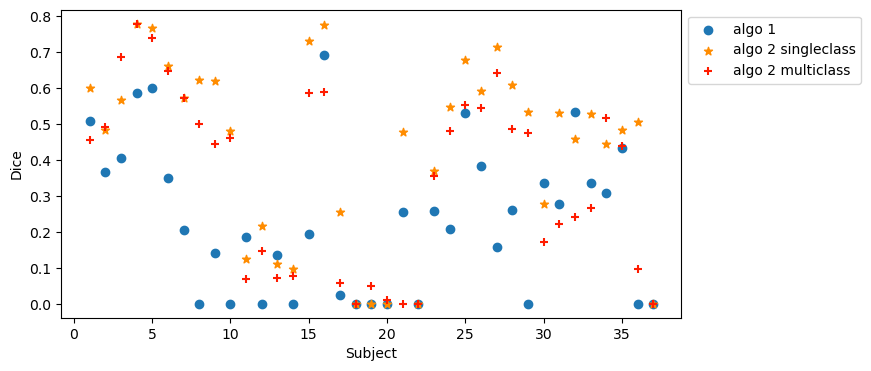

In [12]:
data=data_aniso
columna_1 = data["dice_lesion_algo1"]
columna_2 = data["dice_lesion_single"]
columna_3 = data["dice_lesion_multi"]

plt.figure(figsize=((8,4)))
#plt.fill_between(range(0, 7), 0, 1, color='gray', alpha=0.9, label='sub-MRS')
#plt.fill_between(range(7, 36), 0, 1, color='gray', alpha=0.3, label='sub-NIH')
#plt.fill_between(range(36, 66), 0, 1, color='green', alpha=0.2, label='sub-Basel')
#plt.fill_between(range(6, 81), min(columna_1[:80]), max(columna_1[:80]), color='gray', alpha=0.2, label='sub-Basel')
plt.scatter(range(1, len(columna_1) + 1), columna_1, marker='o', color='#1f77b4', label='algo 1')
plt.scatter(range(1, len(columna_2) + 1), columna_2, marker='*', color='#FF8C00', label='algo 2 singleclass')
plt.scatter(range(1, len(columna_3) + 1), columna_3, marker='+', color='#FF1C00', label='algo 2 multiclass')

#plt.title('UNIT1-den VS UNIT1-nonden')
plt.xlabel('Subject')
plt.ylabel('Dice')
#plt.legend(loc='best')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


dice algo 1 mean: 0.23447152565900828     dice STD: 0.2045401362270218
dice algo 2 single-class mean: 0.4383519536162025     dice STD: 0.24596057087667095
dice algo 2 multi-class mean: 0.3494159821329882     dice STD: 0.2444740159840532
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

dice_lesion_algo1 vs. dice_lesion_single: Wilcoxon test (paired samples), P_val:2.687e-06 Stat=1.300e+01
dice_lesion_single vs. dice_lesion_multi: Wilcoxon test (paired samples), P_val:4.552e-05 Stat=5.900e+01
dice_lesion_algo1 vs. dice_lesion_multi: Wilcoxon test (paired samples), P_val:3.187e-03 Stat=1.250e+02


(<AxesSubplot:xlabel='Group', ylabel='Dice'>,
  <statannotations.Annotation.Annotation at 0x7f6d4d457c50>])

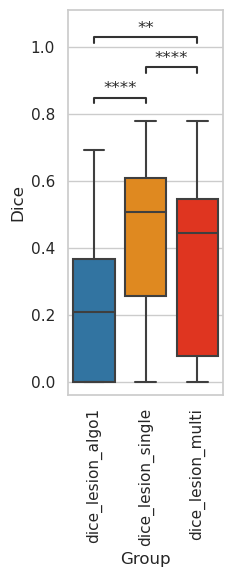

In [303]:
data = data_aniso
df_lesion_algo_1 = data.filter(['dice_lesion_algo1'], axis=1)
df_lesion_algo_1.insert(0, 'Group', 'dice_lesion_algo1')
df_lesion_algo_1.rename(columns={'dice_lesion_algo1': 'Dice'}, inplace=True)

df_lesion_mono = data.filter(['dice_lesion_single'], axis=1)
df_lesion_mono.insert(0, 'Group', 'dice_lesion_single')
df_lesion_mono.rename(columns={'dice_lesion_single': 'Dice'}, inplace=True)

df_lesion_multi = data.filter(['dice_lesion_multi'], axis=1)
df_lesion_multi.insert(0, 'Group', 'dice_lesion_multi')
df_lesion_multi.rename(columns={'dice_lesion_multi': 'Dice'}, inplace=True)

frames = [ df_lesion_algo_1, df_lesion_mono ,df_lesion_multi]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(2,5))
plt.xticks(rotation=90)
colores = ["#1f77b4", "#FF8C00", "#FF1C00"]
ax_gm = sns.boxplot(data=result_gm, x="Group", palette=colores, y="Dice")
print ("dice algo 1 mean:", np.mean(data["dice_lesion_algo1"]) ,"    dice STD:", np.std(data["dice_lesion_algo1"])) 
print ("dice algo 2 single-class mean:", np.mean(data["dice_lesion_single"]) ,"    dice STD:", np.std(data["dice_lesion_single"])) 
print ("dice algo 2 multi-class mean:", np.mean(data["dice_lesion_multi"]) ,"    dice STD:", np.std(data["dice_lesion_multi"])) 


pairs=[
           (("dice_lesion_algo1"), ("dice_lesion_single")),
           (("dice_lesion_algo1"), ("dice_lesion_multi")),
           (("dice_lesion_single"), ("dice_lesion_multi")) ]
annotator_csa_gm = Annotator(ax_gm, pairs, data=result_gm, x="Group", y="Dice")#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()


In [14]:
frames_7T = [data_iso, data_aniso]
result_7T = pd.concat(frames_7T)
result_7T

,subject,dice_lesion_algo1,dice_lesion_single,dice_lesion_multi
0,sub-MRS01_ses-M0,0.576490,0.787402,0.606452
1,sub-MRS04_ses-M0,0.245312,0.637191,0.485465
2,sub-MRS05_ses-M0,0.157846,0.237895,0.166852
3,sub-MRS05_ses-M24,0.167464,0.229508,0.108999
4,sub-MRS06_ses-M0,0.138391,0.356432,0.340871
5,sub-MRS08_ses-M0,0.000000,0.661111,0.428571
6,sub-MRS09_ses-M0,0.000000,0.590476,0.351145
7,sub-MRS10_ses-M0,0.398210,0.653846,0.462222
8,sub-MRS11_ses-M0,0.219887,0.626999,0.535012
9,sub-MRS12_ses-M0,0.383358,0.497479,0.142857


In [283]:
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
result_7T.to_excel(path_database + "dices_7T.xlsx") 

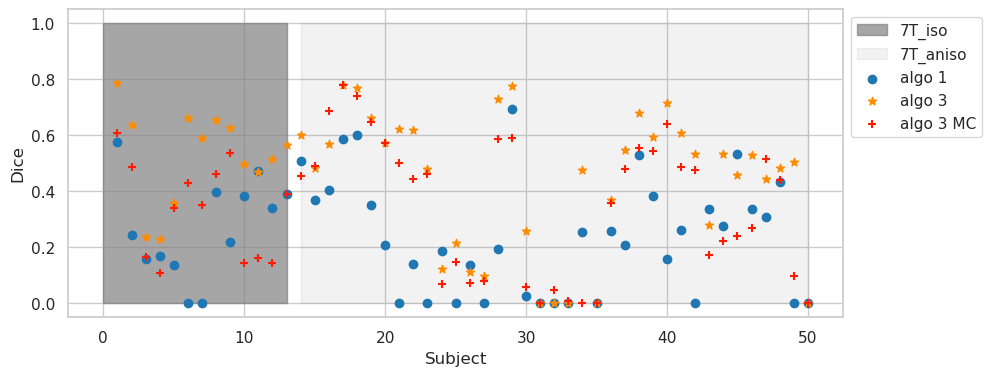

In [305]:
data = result_7T
columna_1 = data["dice_lesion_algo1"]
columna_2 = data["dice_lesion_single"]
columna_3 = data["dice_lesion_multi"]

plt.figure(figsize=((10,4)))
plt.fill_between(range(0, 14), 0, 1, color='gray', alpha=0.7, label='7T_iso')
plt.fill_between(range(14, 51), 0, 1, color='gray', alpha=0.1, label='7T_aniso')
#plt.fill_between(range(36, 66), 0, 1, color='green', alpha=0.2, label='sub-Basel')
#plt.fill_between(range(6, 81), min(columna_1[:80]), max(columna_1[:80]), color='gray', alpha=0.2, label='sub-Basel')
plt.scatter(range(1, len(columna_1) + 1), columna_1, marker='o', color='#1f77b4', label='algo 1')
plt.scatter(range(1, len(columna_2) + 1), columna_2, marker='*', color='#FF8C00', label='algo 3')
plt.scatter(range(1, len(columna_3) + 1), columna_3, marker='+', color='#FF1C00', label='algo 3 MC')

#plt.title('UNIT1-den VS UNIT1-nonden')
plt.xlabel('Subject')
plt.ylabel('Dice')
#plt.legend(loc='best')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


dice algo 1 mean: 0.24328733074281822     dice STD: 0.19656450122823108
dice algo 2 single-class mean: 0.4609033681185143     dice STD: 0.23004786466809465
dice algo 2 multi-class mean: 0.3450086315767909     dice STD: 0.22637547747417813
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

dice_lesion_algo1 vs. dice_lesion_single: Wilcoxon test (paired samples), P_val:1.835e-08 Stat=1.900e+01
dice_lesion_single vs. dice_lesion_multi: Wilcoxon test (paired samples), P_val:1.288e-07 Stat=6.500e+01
dice_lesion_algo1 vs. dice_lesion_multi: Wilcoxon test (paired samples), P_val:2.653e-03 Stat=2.800e+02


(<AxesSubplot:xlabel='Group', ylabel='Dice'>,
  <statannotations.Annotation.Annotation at 0x7f6d1d893910>])

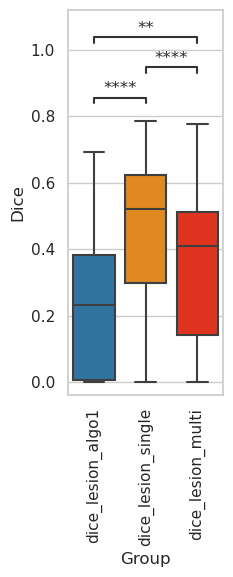

In [306]:
data = result_7T
df_lesion_algo_1 = data.filter(['dice_lesion_algo1'], axis=1)
df_lesion_algo_1.insert(0, 'Group', 'dice_lesion_algo1')
df_lesion_algo_1.rename(columns={'dice_lesion_algo1': 'Dice'}, inplace=True)

df_lesion_mono = data.filter(['dice_lesion_single'], axis=1)
df_lesion_mono.insert(0, 'Group', 'dice_lesion_single')
df_lesion_mono.rename(columns={'dice_lesion_single': 'Dice'}, inplace=True)

df_lesion_multi = data.filter(['dice_lesion_multi'], axis=1)
df_lesion_multi.insert(0, 'Group', 'dice_lesion_multi')
df_lesion_multi.rename(columns={'dice_lesion_multi': 'Dice'}, inplace=True)

frames = [ df_lesion_algo_1, df_lesion_mono ,df_lesion_multi]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(2,5))
plt.xticks(rotation=90)
colores = ["#1f77b4", "#FF8C00", "#FF1C00"]
ax_gm = sns.boxplot(data=result_gm, x="Group", palette=colores, y="Dice")
print ("dice algo 1 mean:", np.mean(data["dice_lesion_algo1"]) ,"    dice STD:", np.std(data["dice_lesion_algo1"])) 
print ("dice algo 2 single-class mean:", np.mean(data["dice_lesion_single"]) ,"    dice STD:", np.std(data["dice_lesion_single"])) 
print ("dice algo 2 multi-class mean:", np.mean(data["dice_lesion_multi"]) ,"    dice STD:", np.std(data["dice_lesion_multi"])) 


pairs=[
           (("dice_lesion_algo1"), ("dice_lesion_single")),
           (("dice_lesion_algo1"), ("dice_lesion_multi")),
           (("dice_lesion_single"), ("dice_lesion_multi")) ]
annotator_csa_gm = Annotator(ax_gm, pairs, data=result_gm, x="Group", y="Dice")#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

# Zero lesion patients

In [240]:
df1=[]
subjects = ["sub-C010-ses-M0", "sub-C012-ses-M0", "sub-C015-ses-M0", "sub-MRS00-ses-M0", "sub-MRS15-ses-M0", "sub-MRS15-ses-M24", "sub-MRS18-ses-M0", "sub-MRS23-ses-M0", "sub-MRS23-ses-M24", "sub-nih003-ses-M0", "sub-nih009-ses-M0", "sub-nih017-ses-M0", "sub-nih021-ses-M0", "sub-nih037-ses-M0", "sub-nih042-ses-M0", "sub-nih043-ses-M0", "sub-nih045-ses-M0", "sub-nih051-ses-M0", "sub-nih052-ses-M0", "sub-nih054-ses-M0", "sub-nih056-ses-M0", "sub-nih067-ses-M0", "sub-nih073-ses-M0", "sub-nih075-ses-M0", "sub-nih084-ses-M0", "sub-nih087-ses-M0", "sub-nih089-ses-M0", "sub-nih092-ses-M0", "sub-nih100-ses-M0", "sub-nih101-ses-M0", "sub-nih110-ses-M0", "sub-nih112-ses-M0", "sub-nih117-ses-M0", "sub-nih120-ses-M0", "sub-nih134-ses-M0", "sub-nih136-ses-M0", "sub-nih144-ses-M0", "sub-nih147-ses-M0", "sub-nih149-ses-M0", "sub-nih155-ses-M0", "sub-nih173-ses-M0", "sub-nih179-ses-M0", "sub-nih183-ses-M0", "sub-nih194-ses-M0", "sub-nih195-ses-M0", "sub-nih199-ses-M0", "sub-P002-ses-M0", "sub-P016-ses-M0", "sub-P021-ses-M0", "sub-P037-ses-M0", "sub-P038-ses-M0", "sub-P044-ses-M0", "sub-P046-ses-M0", "sub-P051-ses-M0", "sub-P058-ses-M0", "sub-P061-ses-M0", "sub-P063-ses-M0", "sub-P066-ses-M0", "sub-P069-ses-M0", "sub-P077-ses-M0", "sub-P079-ses-M0", "sub-P080-ses-M0", "sub-P084-ses-M0", "sub-P085-ses-M0", "sub-P094-ses-M0", "sub-P109-ses-M0", "sub-P120-ses-M0", "sub-P126-ses-M0", "sub-P130-ses-M0", "sub-P132-ses-M0", "sub-P133-ses-M0", "sub-P136-ses-M0", "sub-P149-ses-M0", "sub-P165-ses-M0", "sub-P175-ses-M0", "sub-P178-ses-M0", "sub-P183-ses-M0", "sub-P189-ses-M0", "sub-P199-ses-M0", "sub-P249-ses-M0"]
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
for subject in subjects: 
    gt_lesion_data= nib.load(path_database + '403/GT_sc/'+ subject +'_UNIT1_GT.nii.gz')
    gt_lesion = np.array(gt_lesion_data.get_fdata())
    if  np.max(gt_lesion) == 0 :
        d = {'subject': subject,'lesions':np.max(gt_lesion)}
        df1.append(d)
data_zero = pd.DataFrame(data=df1)
data_zero

,subject,lesions
0,sub-C010-ses-M0,0.0
1,sub-C012-ses-M0,0.0
2,sub-C015-ses-M0,0.0
3,sub-nih017-ses-M0,0.0
4,sub-nih052-ses-M0,0.0
5,sub-nih056-ses-M0,0.0
6,sub-nih084-ses-M0,0.0
7,sub-nih087-ses-M0,0.0
8,sub-nih100-ses-M0,0.0
9,sub-nih155-ses-M0,0.0


In [241]:
df1=[]
subjects=["sub-MRS01_ses-M0","sub-MRS02_ses-M0","sub-MRS04_ses-M0","sub-MRS05_ses-M0","sub-MRS05_ses-M24","sub-MRS06_ses-M0","sub-MRS07_ses-M0","sub-MRS07_ses-M24","sub-MRS08_ses-M0","sub-MRS09_ses-M0","sub-MRS10_ses-M0","sub-MRS11_ses-M0","sub-MRS12_ses-M0","sub-MRS14_ses-M0","sub-MRS14_ses-M24","sub-MRS15_ses-M0","sub-MRS15_ses-M24","sub-MRS16_ses-M0","sub-MRS17_ses-M0","sub-MRS17_ses-M24"]
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/7T/'
for subject in subjects: 
    gt_lesion_data= nib.load(path_database + 'GT_iso/' + subject +'_UNIT1_desc-rater1_label-lesion_seg.nii.gz')
    gt_lesion = np.array(gt_lesion_data.get_fdata())
    if  np.max(gt_lesion) == 0 :
        d = {'subject': subject,'lesions':np.max(gt_lesion)}
        df1.append(d)
data_zero = pd.DataFrame(data=df1)
data_zero

,subject,lesions
0,sub-MRS02_ses-M0,0.0
1,sub-MRS07_ses-M0,0.0
2,sub-MRS07_ses-M24,0.0
3,sub-MRS15_ses-M0,0.0
4,sub-MRS15_ses-M24,0.0
5,sub-MRS17_ses-M0,0.0
6,sub-MRS17_ses-M24,0.0


In [238]:
df1=[]
subjects=["sub-MRS00_ses-M0_run-1", "sub-MRS00_ses-M24_run-1", "sub-MRS00_ses-M24_run-2", "sub-MRS01_ses-M0_run-1", "sub-MRS01_ses-M0_run-2","sub-MRS02_ses-M0_run-1", "sub-MRS03_ses-M0_run-1", "sub-MRS03_ses-M0_run-2", "sub-MRS04_ses-M0_run-1", "sub-MRS04_ses-M0_run-2", "sub-MRS04_ses-M24_run-1", "sub-MRS05_ses-M0_run-1", "sub-MRS05_ses-M0_run-2", "sub-MRS05_ses-M24_run-1", "sub-MRS05_ses-M24_run-2", "sub-MRS06_ses-M0_run-1", "sub-MRS06_ses-M0_run-2", "sub-MRS07_ses-M0_run-1", "sub-MRS07_ses-M0_run-2", "sub-MRS07_ses-M24_run-1", "sub-MRS07_ses-M24_run-2", "sub-MRS08_ses-M0_run-1", "sub-MRS08_ses-M0_run-2", "sub-MRS09_ses-M0_run-1", "sub-MRS09_ses-M0_run-2", "sub-MRS10_ses-M0_run-1", "sub-MRS10_ses-M0_run-2", "sub-MRS11_ses-M0_run-1", "sub-MRS11_ses-M0_run-2", "sub-MRS11_ses-M24_run-1", "sub-MRS11_ses-M24_run-2", "sub-MRS12_ses-M0_run-1", "sub-MRS12_ses-M0_run-2", "sub-MRS13_ses-M0_run-1", "sub-MRS14_ses-M0_run-1", "sub-MRS14_ses-M0_run-2", "sub-MRS14_ses-M24_run-1", "sub-MRS14_ses-M24_run-2", "sub-MRS15_ses-M0_run-1", "sub-MRS15_ses-M0_run-2", "sub-MRS15_ses-M24_run-1", "sub-MRS15_ses-M24_run-2", "sub-MRS16_ses-M0_run-1", "sub-MRS16_ses-M0_run-2", "sub-MRS17_ses-M0_run-1", "sub-MRS17_ses-M0_run-2", "sub-MRS17_ses-M24_run-1", "sub-MRS18_ses-M0_run-1", "sub-MRS18_ses-M0_run-2", "sub-MRS18_ses-M24_run-1"]
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/7T/'
for subject in subjects: 
    gt_lesion_data= nib.load(path_database + 'GT_aniso/' + subject +'_UNIT1_desc-rater1_label-lesion_seg.nii.gz')
    gt_lesion = np.array(gt_lesion_data.get_fdata())
    if  np.max(gt_lesion) == 0 :
        d = {'subject': subject,'lesions':np.max(gt_lesion)}
        df1.append(d)
data_zero = pd.DataFrame(data=df1)
data_zero

,subject,lesions
0,sub-MRS02_ses-M0_run-1,0.0
1,sub-MRS07_ses-M0_run-1,0.0
2,sub-MRS07_ses-M0_run-2,0.0
3,sub-MRS07_ses-M24_run-1,0.0
4,sub-MRS07_ses-M24_run-2,0.0
5,sub-MRS15_ses-M0_run-1,0.0
6,sub-MRS15_ses-M0_run-2,0.0
7,sub-MRS15_ses-M24_run-1,0.0
8,sub-MRS15_ses-M24_run-2,0.0
9,sub-MRS17_ses-M0_run-1,0.0


In [331]:
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
data_zero_lesions = pd.read_excel(path_database + "zero_lesions.xlsx")
data_zero_lesions

,subject,lesions,GT,field,algo 1,algo 3,algo 3 MC
0,1,sub-C010-ses-M0,0,3T,0,0,0
1,2,sub-C012-ses-M0,0,3T,0,0,0
2,3,sub-C015-ses-M0,0,3T,0,0,0
3,4,sub-nih017-ses-M0,0,3T,2,0,0
4,5,sub-nih052-ses-M0,0,3T,1,0,0
5,6,sub-nih056-ses-M0,0,3T,0,0,0
6,7,sub-nih084-ses-M0,0,3T,0,0,0
7,8,sub-nih087-ses-M0,0,3T,0,0,0
8,9,sub-nih100-ses-M0,0,3T,0,0,0
9,10,sub-nih155-ses-M0,0,3T,1,0,0


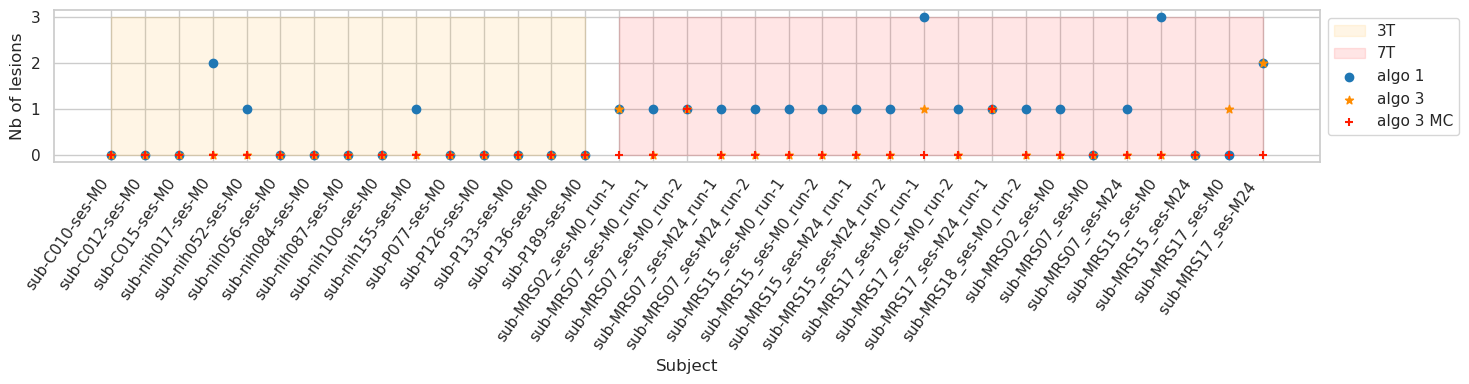

In [339]:
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
data_zero_lesions = pd.read_excel(path_database + "zero_lesions.xlsx")

data = data_zero_lesions
columna_1 = data["algo 1"]
columna_2 = data["algo 3"]
columna_3 = data["algo 3 MC"]

# Definir los nombres de los sujetos
nombres_sujetos = data["lesions"].tolist()

plt.figure(figsize=((15,4)))
plt.fill_between(range(1, 16), 0, 3, color='orange', alpha=0.1, label='3T')
plt.fill_between(range(16, 36), 0, 3, color='red', alpha=0.1, label='7T')
#plt.fill_between(range(16, 35), 0, 3, color='green', alpha=0.2, label='sub-Basel')
#plt.fill_between(range(6, 81), min(columna_1[:80]), max(columna_1[:80]), color='gray', alpha=0.2, label='sub-Basel')
plt.scatter(range(1, len(columna_1) + 1), columna_1, marker='o', color='#1f77b4', label='algo 1')
plt.scatter(range(1, len(columna_2) + 1), columna_2, marker='*', color='#FF8C00', label='algo 3')
plt.scatter(range(1, len(columna_3) + 1), columna_3, marker='+', color='#FF1C00', label='algo 3 MC')

# Establecer los nombres de los sujetos en el eje x
plt.xticks(range(1, len(nombres_sujetos) + 1), nombres_sujetos, rotation=55, ha='right')

#plt.title('UNIT1-den VS UNIT1-nonden')
plt.xlabel('Subject')
plt.ylabel('Nb of lesions')
#plt.legend(loc='best')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

# Lesion detection

# 3T test


In [316]:
df=[]
path_database  = '/mnt/d/Poly/project_ms_seg/'
data_excel = pd.read_excel(path_database + "3t_metrics_F1_sensitivity_mp2rage.xlsx")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/nlaines/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Sensitivity algo 1 mean: 0.801055611055611 Sensitivity STD: 0.23870182272596754
Sensitivity algo 3 mean: 0.8087479187479187 Sensitivity STD: 0.2211765776015126
Sensitivity algo 3 MC mean: 0.7653779553779552 Sensitivity STD: 0.24308886784059408
Precision algo 1 mean: 0.868070818070818 Precision STD: 0.23870182272596754
Precision algo 3 mean: 0.9298534798534799 Precision STD: 0.24308886784059408
Precision algo 3 MC mean: 0.9229304029304028 Precision STD: 0.2211765776015126
F1 score algo 1 mean: 0.81014545283776 F1 score STD: 0.21411196719058345
F1 score algo 3 mean: 0.8496257588565275 F1 score STD: 0.2272806047119562
F1 score algo 3 MC mean: 0.8208356600664287 F1 score STD: 0.25292030512671937
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sensitivity algo 1 vs. Sensitivity algo 3: Wilcoxon test (paired samples), P_val:6.698e-01 Stat=8.450e+01
Sensitivity 

(<AxesSubplot:xlabel='Group', ylabel='Metric'>,
  <statannotations.Annotation.Annotation at 0x7f6d4dca19d0>])

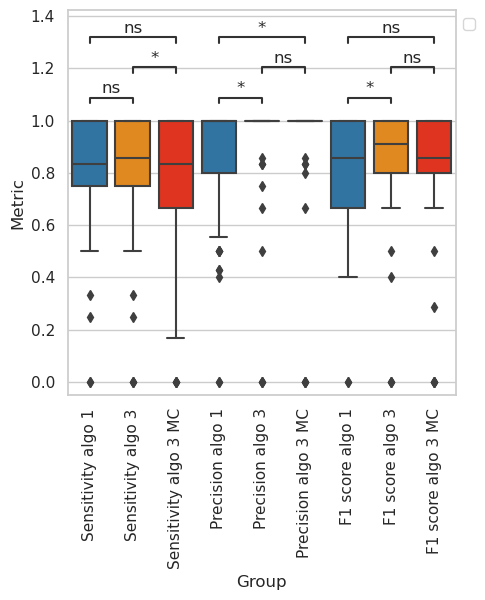

In [323]:
data = data_excel
df_Sensitivity_algo_1 = data.filter(['Sensitivity algo 1'], axis=1)
df_Sensitivity_algo_1.insert(0, 'Group', 'Sensitivity algo 1')
df_Sensitivity_algo_1.rename(columns={'Sensitivity algo 1': 'Metric'}, inplace=True)
df_Sensitivity_algo_3 = data.filter(['Sensitivity algo 3'], axis=1)
df_Sensitivity_algo_3.insert(0, 'Group', 'Sensitivity algo 3')
df_Sensitivity_algo_3.rename(columns={'Sensitivity algo 3': 'Metric'}, inplace=True)
df_Sensitivity_algo_3_mc = data.filter(['Sensitivity algo 3 MC'], axis=1)
df_Sensitivity_algo_3_mc.insert(0, 'Group', 'Sensitivity algo 3 MC')
df_Sensitivity_algo_3_mc.rename(columns={'Sensitivity algo 3 MC': 'Metric'}, inplace=True)


df_Precision_algo_1 = data.filter(['Precision algo 1'], axis=1)
df_Precision_algo_1.insert(0, 'Group', 'Precision algo 1')
df_Precision_algo_1.rename(columns={'Precision algo 1': 'Metric'}, inplace=True)
df_Precision_algo_3 = data.filter(['Precision algo 3'], axis=1)
df_Precision_algo_3.insert(0, 'Group', 'Precision algo 3')
df_Precision_algo_3.rename(columns={'Precision algo 3': 'Metric'}, inplace=True)
df_Precision_algo_3_mc = data.filter(['Precision algo 3 MC'], axis=1)
df_Precision_algo_3_mc.insert(0, 'Group', 'Precision algo 3 MC')
df_Precision_algo_3_mc.rename(columns={'Precision algo 3 MC': 'Metric'}, inplace=True)

df_F1_algo_1 = data.filter(['F1 score algo 1'], axis=1)
df_F1_algo_1.insert(0, 'Group', 'F1 score algo 1')
df_F1_algo_1.rename(columns={'F1 score algo 1': 'Metric'}, inplace=True)
df_F1_algo_3 = data.filter(['F1 score algo 3'], axis=1)
df_F1_algo_3.insert(0, 'Group', 'F1 score algo 3')
df_F1_algo_3.rename(columns={'F1 score algo 3': 'Metric'}, inplace=True)
df_F1_algo_3_mc = data.filter(['F1 score algo 3 MC'], axis=1)
df_F1_algo_3_mc.insert(0, 'Group', 'F1 score algo 3 MC')
df_F1_algo_3_mc.rename(columns={'F1 score algo 3 MC': 'Metric'}, inplace=True)

frames = [df_Sensitivity_algo_1, df_Sensitivity_algo_3, df_Sensitivity_algo_3_mc, df_Precision_algo_1, df_Precision_algo_3, 
          df_Precision_algo_3_mc , df_F1_algo_1, df_F1_algo_3, df_F1_algo_3_mc]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
colores = ["#1f77b4", "#FF8C00", "#FF1C00"]
ax_gm = sns.boxplot(data=result_gm, x="Group", palette=colores,  y="Metric")



print ("Sensitivity algo 1 mean:", np.mean(data["Sensitivity algo 1"]) ,"Sensitivity STD:", np.std(data["Precision algo 1"])) 
print ("Sensitivity algo 3 mean:", np.mean(data["Sensitivity algo 3"]) ,"Sensitivity STD:", np.std(data["Precision algo 3"])) 
print ("Sensitivity algo 3 MC mean:", np.mean(data["Sensitivity algo 3 MC"]) ,"Sensitivity STD:", np.std(data["Precision algo 3 MC"])) 
print ("Precision algo 1 mean:", np.mean(data["Precision algo 1"]) ,"Precision STD:", np.std(data["Precision algo 1"]))
print ("Precision algo 3 mean:", np.mean(data["Precision algo 3"]) ,"Precision STD:", np.std(data["Precision algo 3 MC"])) 
print ("Precision algo 3 MC mean:", np.mean(data["Precision algo 3 MC"]) ,"Precision STD:", np.std(data["Precision algo 3"])) 
print ("F1 score algo 1 mean:", np.mean(data["F1 score algo 1"]) ,"F1 score STD:", np.std(data["F1 score algo 1"])) 
print ("F1 score algo 3 mean:", np.mean(data["F1 score algo 3"]) ,"F1 score STD:", np.std(data["F1 score algo 3"])) 
print ("F1 score algo 3 MC mean:", np.mean(data["F1 score algo 3 MC"]) ,"F1 score STD:", np.std(data["F1 score algo 3 MC"])) 

pairs=[
           (("Sensitivity algo 1"), ("Sensitivity algo 3")),
           (("Sensitivity algo 1"), ("Sensitivity algo 3 MC")),
           (("Sensitivity algo 3"), ("Sensitivity algo 3 MC")),
            (("Precision algo 1"), ("Precision algo 3")),
            (("Precision algo 1"), ("Precision algo 3 MC")),
            (("Precision algo 3"), ("Precision algo 3 MC")),
           (("F1 score algo 1"), ("F1 score algo 3")),
            (("F1 score algo 1"), ("F1 score algo 3 MC")),
            (("F1 score algo 3"), ("F1 score algo 3 MC"))
]
annotator_csa_gm = Annotator(ax_gm, pairs, data=result_gm, x="Group", y="Metric")#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

# 7T aniso

In [321]:
df=[]
path_database  = '/mnt/d/Poly/project_ms_seg/'
data_excel_7t = pd.read_excel(path_database + "7t_metrics_F1_sensitivity_mp2rage.xlsx")
data_excel_7t

,subject,dice algo1,dice algo 3,dice algo 3 MC,Sensitivity algo 1,Sensitivity algo 3,Sensitivity algo 3 MC,Precision algo 1,Precision algo 3,Precision algo 3 MC,F1 score algo 1,F1 score algo 3,F1 score algo 3 MC
0,sub-MRS00_ses-M0_run-1,0.508227,0.601405,0.454433,0.727273,0.727273,0.545455,0.727273,0.800000,1.000000,0.727273,0.761905,0.705882
1,sub-MRS00_ses-M24_run-1,0.367181,0.483068,0.491018,0.750000,1.000000,0.500000,0.857143,0.888889,0.666667,0.800000,0.941176,0.571429
2,sub-MRS00_ses-M24_run-2,0.405126,0.567731,0.686071,0.714286,1.000000,0.714286,0.714286,0.875000,1.000000,0.714286,0.933333,0.833333
3,sub-MRS01_ses-M0,0.576490,0.787402,0.606452,0.750000,1.000000,0.750000,0.750000,1.000000,1.000000,0.750000,1.000000,0.857143
4,sub-MRS01_ses-M0_run-1,0.586035,0.779359,0.777778,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000
5,sub-MRS01_ses-M0_run-2,0.600000,0.768696,0.739040,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000
6,sub-MRS03_ses-M0_run-1,0.349933,0.660300,0.648622,0.272727,0.454545,0.454545,1.000000,1.000000,1.000000,0.428571,0.625000,0.625000
7,sub-MRS03_ses-M0_run-2,0.206578,0.573577,0.573010,0.300000,0.500000,0.500000,1.000000,1.000000,1.000000,0.461538,0.666667,0.666667
8,sub-MRS04_ses-M0,0.245312,0.637191,0.485465,0.400000,0.600000,0.600000,1.000000,1.000000,1.000000,0.571429,0.750000,0.750000
9,sub-MRS04_ses-M0_run-1,0.000000,0.623501,0.501370,0.000000,0.500000,0.500000,0.000000,1.000000,1.000000,0.000000,0.666667,0.666667


Sensitivity algo 1 mean: 0.400623949579832 Sensitivity STD: 0.38714110281898106
Sensitivity algo 3 mean: 0.5262818309141839 Sensitivity STD: 0.30475897826389226
Sensitivity algo 3 MC mean: 0.4078004626092861 Sensitivity STD: 0.34976579465566804
Precision algo 1 mean: 0.6114898989898991 Precision STD: 0.38714110281898106
Precision algo 3 mean: 0.8629920634920635 Precision STD: 0.34976579465566804
Precision algo 3 MC mean: 0.8383333333333333 Precision STD: 0.30475897826389226
F1 score algo 1 mean: 0.4503918232094703 F1 score STD: 0.29047797970223105
F1 score algo 3 mean: 0.6159296768874776 F1 score STD: 0.28720250975714295
F1 score algo 3 MC mean: 0.5232138534336143 F1 score STD: 0.28353123239126327
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sensitivity algo 1 vs. Sensitivity algo 3: Wilcoxon test (paired samples), P_val:8.818e-04 Stat=1.215e+02
Sensit

(<AxesSubplot:xlabel='Group', ylabel='Metric'>,
  <statannotations.Annotation.Annotation at 0x7f6d1d395390>])

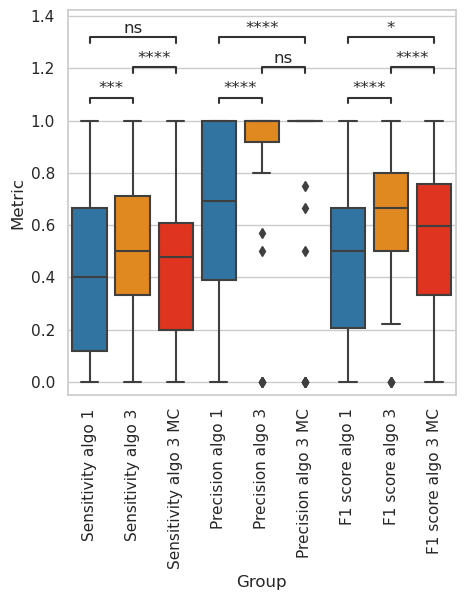

In [320]:
data = data_excel_7t
df_Sensitivity_algo_1 = data.filter(['Sensitivity algo 1'], axis=1)
df_Sensitivity_algo_1.insert(0, 'Group', 'Sensitivity algo 1')
df_Sensitivity_algo_1.rename(columns={'Sensitivity algo 1': 'Metric'}, inplace=True)
df_Sensitivity_algo_3 = data.filter(['Sensitivity algo 3'], axis=1)
df_Sensitivity_algo_3.insert(0, 'Group', 'Sensitivity algo 3')
df_Sensitivity_algo_3.rename(columns={'Sensitivity algo 3': 'Metric'}, inplace=True)
df_Sensitivity_algo_3_mc = data.filter(['Sensitivity algo 3 MC'], axis=1)
df_Sensitivity_algo_3_mc.insert(0, 'Group', 'Sensitivity algo 3 MC')
df_Sensitivity_algo_3_mc.rename(columns={'Sensitivity algo 3 MC': 'Metric'}, inplace=True)


df_Precision_algo_1 = data.filter(['Precision algo 1'], axis=1)
df_Precision_algo_1.insert(0, 'Group', 'Precision algo 1')
df_Precision_algo_1.rename(columns={'Precision algo 1': 'Metric'}, inplace=True)
df_Precision_algo_3 = data.filter(['Precision algo 3'], axis=1)
df_Precision_algo_3.insert(0, 'Group', 'Precision algo 3')
df_Precision_algo_3.rename(columns={'Precision algo 3': 'Metric'}, inplace=True)
df_Precision_algo_3_mc = data.filter(['Precision algo 3 MC'], axis=1)
df_Precision_algo_3_mc.insert(0, 'Group', 'Precision algo 3 MC')
df_Precision_algo_3_mc.rename(columns={'Precision algo 3 MC': 'Metric'}, inplace=True)

df_F1_algo_1 = data.filter(['F1 score algo 1'], axis=1)
df_F1_algo_1.insert(0, 'Group', 'F1 score algo 1')
df_F1_algo_1.rename(columns={'F1 score algo 1': 'Metric'}, inplace=True)
df_F1_algo_3 = data.filter(['F1 score algo 3'], axis=1)
df_F1_algo_3.insert(0, 'Group', 'F1 score algo 3')
df_F1_algo_3.rename(columns={'F1 score algo 3': 'Metric'}, inplace=True)
df_F1_algo_3_mc = data.filter(['F1 score algo 3 MC'], axis=1)
df_F1_algo_3_mc.insert(0, 'Group', 'F1 score algo 3 MC')
df_F1_algo_3_mc.rename(columns={'F1 score algo 3 MC': 'Metric'}, inplace=True)

frames = [df_Sensitivity_algo_1, df_Sensitivity_algo_3, df_Sensitivity_algo_3_mc, df_Precision_algo_1, df_Precision_algo_3, 
          df_Precision_algo_3_mc , df_F1_algo_1, df_F1_algo_3, df_F1_algo_3_mc]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
colores = ["#1f77b4", "#FF8C00", "#FF1C00"]
ax_gm = sns.boxplot(data=result_gm, x="Group", palette=colores,  y="Metric")



print ("Sensitivity algo 1 mean:", np.mean(data["Sensitivity algo 1"]) ,"Sensitivity STD:", np.std(data["Precision algo 1"])) 
print ("Sensitivity algo 3 mean:", np.mean(data["Sensitivity algo 3"]) ,"Sensitivity STD:", np.std(data["Precision algo 3"])) 
print ("Sensitivity algo 3 MC mean:", np.mean(data["Sensitivity algo 3 MC"]) ,"Sensitivity STD:", np.std(data["Precision algo 3 MC"])) 
print ("Precision algo 1 mean:", np.mean(data["Precision algo 1"]) ,"Precision STD:", np.std(data["Precision algo 1"]))
print ("Precision algo 3 mean:", np.mean(data["Precision algo 3"]) ,"Precision STD:", np.std(data["Precision algo 3 MC"])) 
print ("Precision algo 3 MC mean:", np.mean(data["Precision algo 3 MC"]) ,"Precision STD:", np.std(data["Precision algo 3"])) 
print ("F1 score algo 1 mean:", np.mean(data["F1 score algo 1"]) ,"F1 score STD:", np.std(data["F1 score algo 1"])) 
print ("F1 score algo 3 mean:", np.mean(data["F1 score algo 3"]) ,"F1 score STD:", np.std(data["F1 score algo 3"])) 
print ("F1 score algo 3 MC mean:", np.mean(data["F1 score algo 3 MC"]) ,"F1 score STD:", np.std(data["F1 score algo 3 MC"])) 

pairs=[
           (("Sensitivity algo 1"), ("Sensitivity algo 3")),
           (("Sensitivity algo 1"), ("Sensitivity algo 3 MC")),
           (("Sensitivity algo 3"), ("Sensitivity algo 3 MC")),
            (("Precision algo 1"), ("Precision algo 3")),
            (("Precision algo 1"), ("Precision algo 3 MC")),
            (("Precision algo 3"), ("Precision algo 3 MC")),
           (("F1 score algo 1"), ("F1 score algo 3")),
            (("F1 score algo 1"), ("F1 score algo 3 MC")),
            (("F1 score algo 3"), ("F1 score algo 3 MC"))
]
annotator_csa_gm = Annotator(ax_gm, pairs, data=result_gm, x="Group", y="Metric")#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

In [315]:
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
data_3T = pd.read_excel(path_database + "dices_3T.xlsx") 
data_7T = pd.read_excel(path_database + "dices_7T.xlsx") 

## 3T 7T dices

In [48]:
data_3T.insert(0, 'field', '3T')
data_7T.insert(0, 'field', '7T')
frames_3T7T = [data_3T, data_7T]
result_3T7T = pd.concat(frames_3T7T)
result_3T7T

,field,Unnamed: 0,subject,dice_lesion_algo1,dice_lesion_single,dice_lesion_multi
0,3T,0,sub-MRS00-ses-M0,0.272853,0.635678,0.548431
1,3T,1,sub-MRS15-ses-M0,0.090409,0.721868,0.656020
2,3T,2,sub-MRS15-ses-M24,0.122134,0.763158,0.661224
3,3T,3,sub-MRS18-ses-M0,0.401709,0.517857,0.175824
4,3T,4,sub-MRS23-ses-M0,0.077063,0.746186,0.537415
...,...,...,...,...,...,...
45,7T,32,sub-MRS14_ses-M24_run-2,0.335290,0.528416,0.267511
46,7T,33,sub-MRS16_ses-M0_run-1,0.307692,0.444444,0.516908
47,7T,34,sub-MRS16_ses-M0_run-2,0.433031,0.484490,0.438538
48,7T,35,sub-MRS18_ses-M0_run-1,0.000000,0.505495,0.096386


In [49]:
df = pd.DataFrame(result_3T7T)
# Eliminar la columna 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)
# Crear una nueva columna 'DICE' y apilar las columnas 'dice_lesion_algo1', 'dice_lesion_single' y 'dice_lesion_multi'
df = df.melt(id_vars=['field', 'subject'], var_name='Methods', value_name='DSC')
# Mostrar el DataFrame resultante
print(df)

    field                  subject            Methods       DSC
0      3T         sub-MRS00-ses-M0  dice_lesion_algo1  0.272853
1      3T         sub-MRS15-ses-M0  dice_lesion_algo1  0.090409
2      3T        sub-MRS15-ses-M24  dice_lesion_algo1  0.122134
3      3T         sub-MRS18-ses-M0  dice_lesion_algo1  0.401709
4      3T         sub-MRS23-ses-M0  dice_lesion_algo1  0.077063
..    ...                      ...                ...       ...
340    7T  sub-MRS14_ses-M24_run-2  dice_lesion_multi  0.267511
341    7T   sub-MRS16_ses-M0_run-1  dice_lesion_multi  0.516908
342    7T   sub-MRS16_ses-M0_run-2  dice_lesion_multi  0.438538
343    7T   sub-MRS18_ses-M0_run-1  dice_lesion_multi  0.096386
344    7T  sub-MRS18_ses-M24_run-1  dice_lesion_multi  0.000000

[345 rows x 4 columns]


(array([0, 1, 2]),
 [Text(0, 0, 'dice_lesion_algo1'),
  Text(1, 0, 'dice_lesion_single'),
  Text(2, 0, 'dice_lesion_multi')])

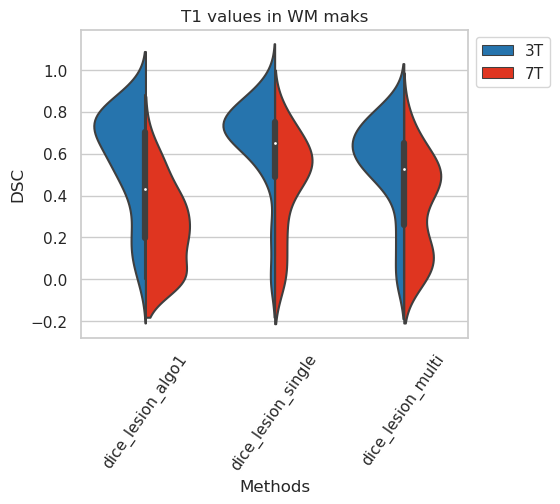

In [54]:
colores = ["#0f77c4",  "#FF1C00"]
sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
plt.title("T1 values in WM maks")
#ax_csa_wm = sns.violinplot(data=result, x="Region", y="T1", hue="Laterality", split=True) #swarmplot
ax_csa_gm = sns.violinplot(data=df, palette=colores, x="Methods", y="DSC", hue="field", split=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=55)

In [324]:
path_database  = '/mnt/d/Poly/project_ms_seg/'
data_3T = pd.read_excel(path_database + "3t_metrics_F1_sensitivity_mp2rage.xlsx")
data_7T = pd.read_excel(path_database + "7t_metrics_F1_sensitivity_mp2rage.xlsx")
data_3T.insert(0, 'field', '3T')
data_7T.insert(0, 'field', '7T')
frames_3T7T = [data_3T, data_7T]
result_3T7T = pd.concat(frames_3T7T)
df = pd.DataFrame(result_3T7T)
# Eliminar la columna 'Unnamed: 0'
#df.drop(columns=['Unnamed: 0'], inplace=True)
# Crear una nueva columna 'DICE' y apilar las columnas 'dice_lesion_algo1', 'dice_lesion_single' y 'dice_lesion_multi'
df = df.melt(id_vars=['field', 'subject'], var_name='Methods', value_name='Metrics')
# Mostrar el DataFrame resultante
print(df)

     field                  subject             Methods   Metrics
0       3T         sub-MRS00-ses-M0          dice algo1  0.272853
1       3T         sub-MRS15-ses-M0          dice algo1  0.090409
2       3T        sub-MRS15-ses-M24          dice algo1  0.122134
3       3T         sub-MRS18-ses-M0          dice algo1  0.401709
4       3T         sub-MRS23-ses-M0          dice algo1  0.077063
...    ...                      ...                 ...       ...
1375    7T         sub-MRS16_ses-M0  F1 score algo 3 MC  0.666667
1376    7T   sub-MRS16_ses-M0_run-1  F1 score algo 3 MC  0.800000
1377    7T   sub-MRS16_ses-M0_run-2  F1 score algo 3 MC  0.400000
1378    7T   sub-MRS18_ses-M0_run-1  F1 score algo 3 MC  0.000000
1379    7T  sub-MRS18_ses-M24_run-1  F1 score algo 3 MC  0.000000

[1380 rows x 4 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'dice algo1'),
  Text(1, 0, 'dice algo 3'),
  Text(2, 0, 'dice algo 3 MC'),
  Text(3, 0, 'Sensitivity algo 1'),
  Text(4, 0, 'Sensitivity algo 3'),
  Text(5, 0, 'Sensitivity algo 3 MC'),
  Text(6, 0, 'Precision algo 1'),
  Text(7, 0, 'Precision algo 3'),
  Text(8, 0, 'Precision algo 3 MC'),
  Text(9, 0, 'F1 score algo 1'),
  Text(10, 0, 'F1 score algo 3'),
  Text(11, 0, 'F1 score algo 3 MC')])

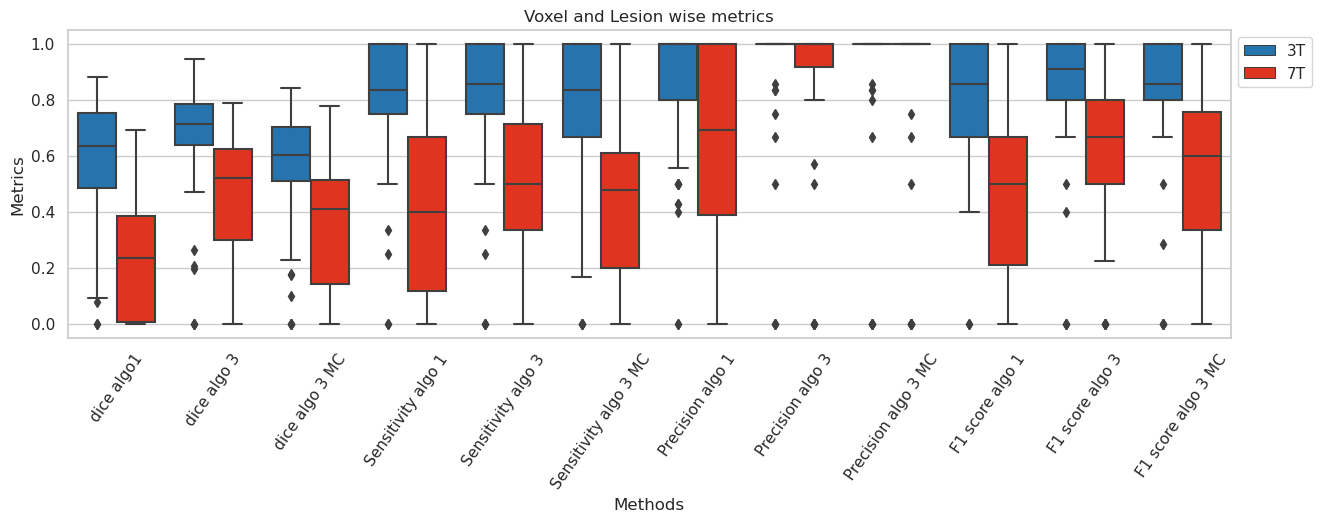

In [325]:
colores = ["#0f77c4",  "#FF1C00"]
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
plt.title("Voxel and Lesion wise metrics")
#ax_csa_wm = sns.violinplot(data=result, x="Region", y="T1", hue="Laterality", split=True) #swarmplot
#ax_csa_gm = sns.violinplot(data=df, palette=colores, x="Methods", y="Metrics", hue="field", split=True)
ax_csa_gm = sns.boxplot(data=df, palette=colores, x="Methods", y="Metrics", hue="field")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=55)

/home/nlaines/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nlaines/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nlaines/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nlaines/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nlaines/anaconda3/lib/python3.7/site-packages/seaborn/categorica

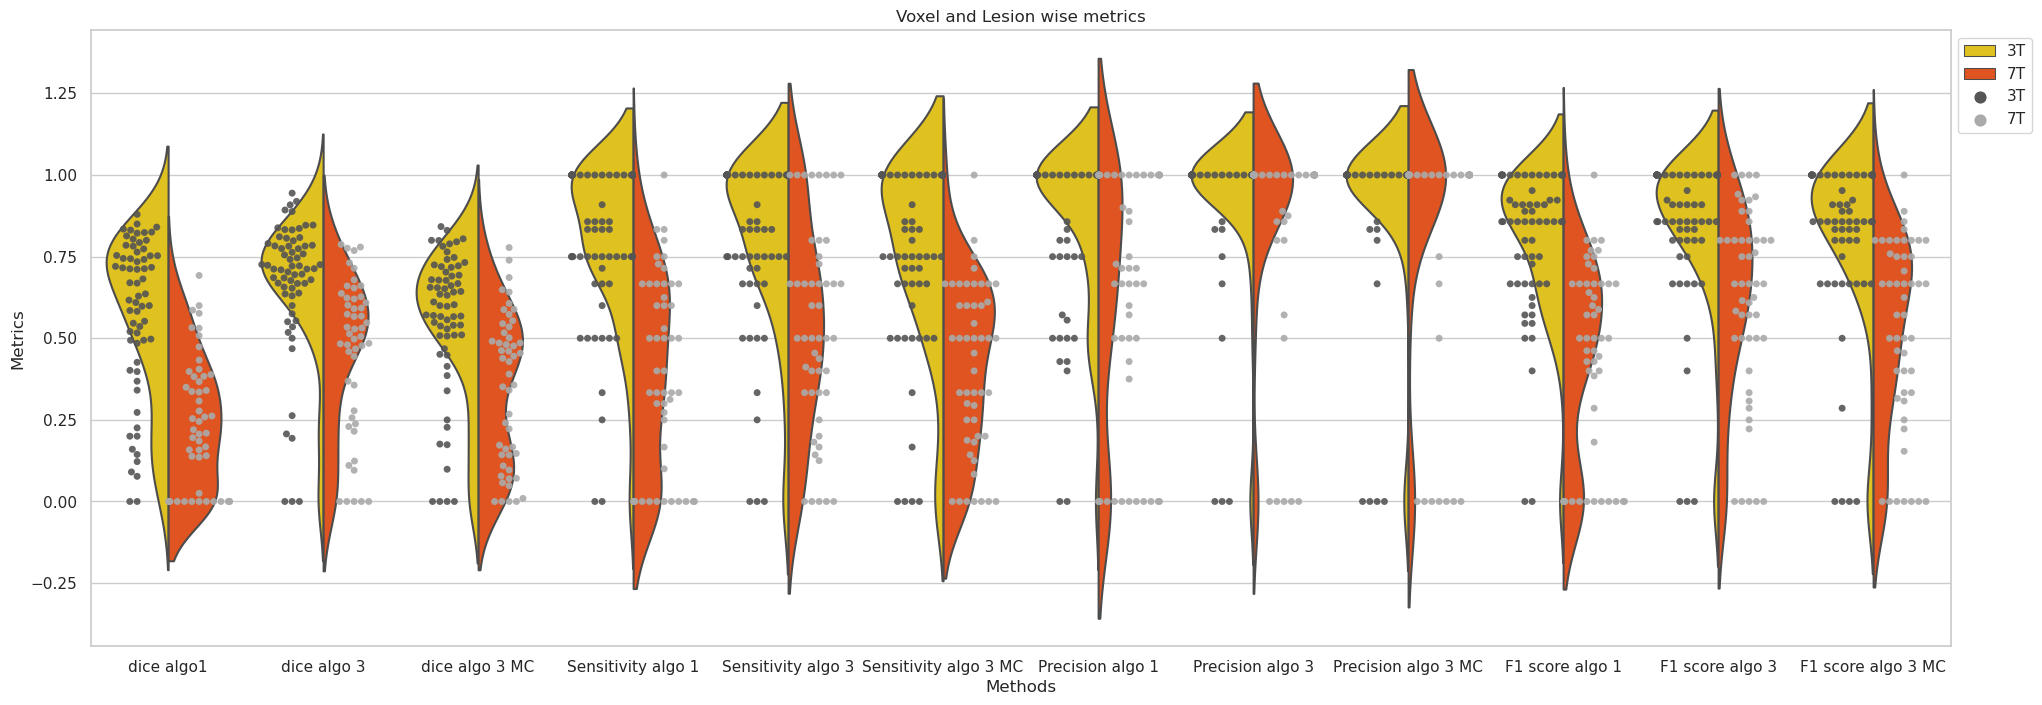

In [328]:
#colores = ["#0f77c4",  "#FF1C00"]
colores = [ "#FFD700", "#FF4500"]

sns.set(style="whitegrid")
plt.figure(figsize=(24,8))
plt.title("Voxel and Lesion wise metrics")
#ax_csa_wm = sns.violinplot(data=result, x="Region", y="T1", hue="Laterality", split=True) #swarmplot
ax_csa_gm = sns.violinplot(data=df, palette=colores, x="Methods", y="Metrics", hue="field", split=True , inner=None,alpha=0.3)

# Agregar scatter plot
sns.swarmplot(data=df, x="Methods", y="Metrics", hue="field", dodge=True, palette="gray", alpha=0.9)
#ax_csa_gm = sns.violinplot(data=df, palette=colores, x="Methods", y="Metrics", hue="field", split=True, showfliers=False)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.xticks(rotation=5)

In [142]:
path_database  = '/mnt/d/Poly/project_ms_seg/'
lesions = pd.read_excel(path_database + "lesions.xlsx")

df = pd.DataFrame(lesions)
# Eliminar la columna 'Unnamed: 0'
#df.drop(columns=['Unnamed: 0'], inplace=True)
# Crear una nueva columna 'DICE' y apilar las columnas 'dice_lesion_algo1', 'dice_lesion_single' y 'dice_lesion_multi'
df = df.melt(id_vars=['field', 'subject'], var_name='Methods', value_name='Nb of lesions')
# Mostrar el DataFrame resultante
print(df)

    field                  subject          Methods  Nb of lesions
0      3T         sub-MRS00-ses-M0         Total GT              7
1      3T         sub-MRS15-ses-M0         Total GT              6
2      3T        sub-MRS15-ses-M24         Total GT              6
3      3T         sub-MRS18-ses-M0         Total GT              2
4      3T         sub-MRS23-ses-M0         Total GT              4
..    ...                      ...              ...            ...
455    7T  sub-MRS14_ses-M24_run-2  Total algo 3 MC              6
456    7T   sub-MRS16_ses-M0_run-1  Total algo 3 MC              2
457    7T   sub-MRS16_ses-M0_run-2  Total algo 3 MC              2
458    7T   sub-MRS18_ses-M0_run-1  Total algo 3 MC              0
459    7T  sub-MRS18_ses-M24_run-1  Total algo 3 MC              0

[460 rows x 4 columns]


/home/nlaines/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


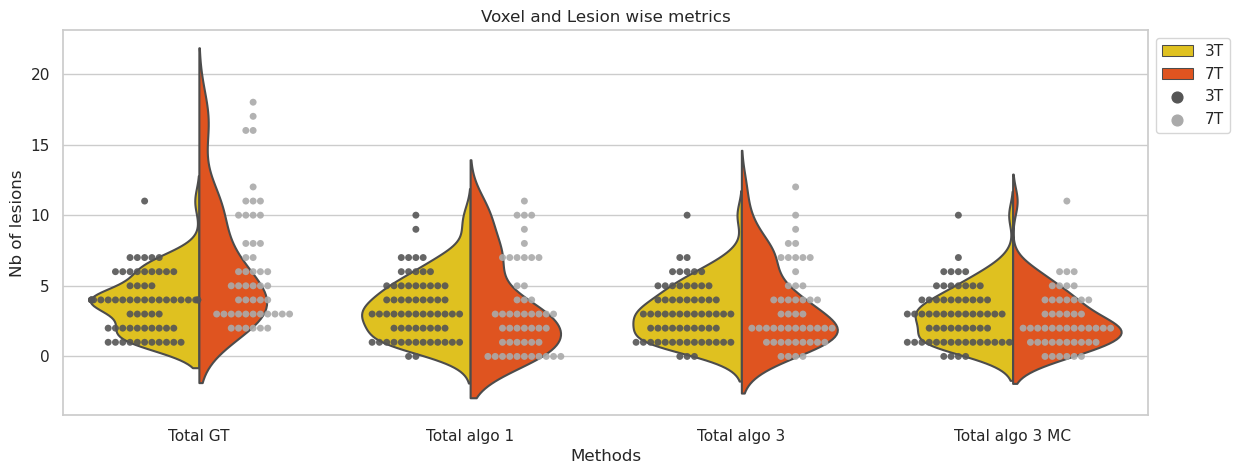

In [144]:
#colores = ["#0f77c4",  "#FF1C00"]
colores = [ "#FFD700", "#FF4500"]

sns.set(style="whitegrid")
plt.figure(figsize=(14,5))
plt.title("Voxel and Lesion wise metrics")
#ax_csa_wm = sns.violinplot(data=result, x="Region", y="T1", hue="Laterality", split=True) #swarmplot
ax_csa_gm = sns.violinplot(data=df, palette=colores, x="Methods", y="Nb of lesions", hue="field", split=True , inner=None,alpha=0.3)

# Agregar scatter plot
sns.swarmplot(data=df, x="Methods", y="Nb of lesions", hue="field", dodge=True, palette="gray", alpha=0.9)
#ax_csa_gm = sns.violinplot(data=df, palette=colores, x="Methods", y="Metrics", hue="field", split=True, showfliers=False)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.xticks(rotation=5)

In [147]:
lesions

,subject,field,Total GT,Total algo 1,Total algo 3,Total algo 3 MC
0,sub-MRS00-ses-M0,3T,7,9,5,5
1,sub-MRS15-ses-M0,3T,6,5,6,6
2,sub-MRS15-ses-M24,3T,6,3,5,5
3,sub-MRS18-ses-M0,3T,2,5,1,1
4,sub-MRS23-ses-M0,3T,4,7,4,3
...,...,...,...,...,...,...
110,sub-MRS14_ses-M24_run-2,7T,10,7,8,6
111,sub-MRS16_ses-M0_run-1,7T,3,3,2,2
112,sub-MRS16_ses-M0_run-2,7T,3,3,1,2
113,sub-MRS18_ses-M0_run-1,7T,2,0,1,0


In [182]:
lesions["Total algo 1"]

0      9
1      5
2      3
3      5
4      7
      ..
110    7
111    3
112    3
113    0
114    0
Name: Total algo 1, Length: 115, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


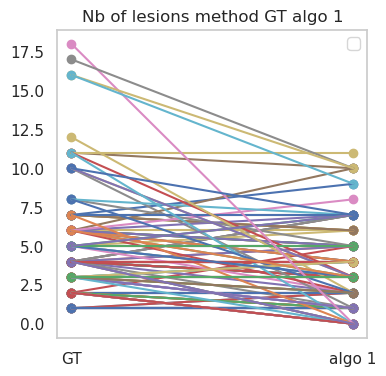

In [183]:
p1 = lesions["Total GT"]
p2 = lesions["Total algo 1"]
p3 = lesions["Total algo 3"]
p4 = lesions["Total algo 3 MC"]
pairs = list(zip(p1, p2))
#subjects = [1, 2, 3, 4, 5]

plt.figure(figsize=(4, 4))
for i, pair in enumerate(pairs):

    plt.plot(("GT", "algo 1"), pair)
    plt.scatter(("GT", "algo 1"), pair)
plt.legend(loc="best")
plt.grid()
plt.title("Nb of lesions method GT algo 1")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


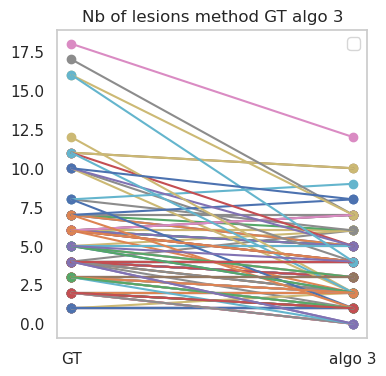

In [184]:
p1 = lesions["Total GT"]
p2 = lesions["Total algo 1"]
p3 = lesions["Total algo 3"]
p4 = lesions["Total algo 3 MC"]
pairs = list(zip(p1, p3))
#subjects = [1, 2, 3, 4, 5]

plt.figure(figsize=(4, 4))
for i, pair in enumerate(pairs):

    plt.plot(("GT", "algo 3"), pair)
    plt.scatter(("GT", "algo 3"), pair)
plt.legend(loc="best")
plt.grid()
plt.title("Nb of lesions method GT algo 3")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


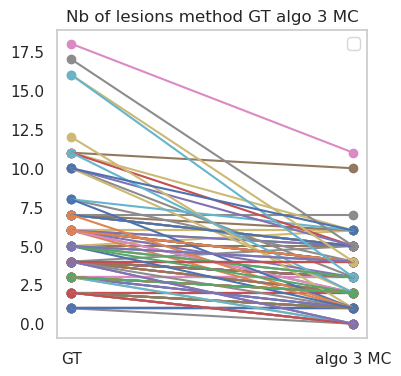

In [185]:
p1 = lesions["Total GT"]
p2 = lesions["Total algo 1"]
p3 = lesions["Total algo 3"]
p4 = lesions["Total algo 3 MC"]
pairs = list(zip(p1, p4))
#subjects = [1, 2, 3, 4, 5]

plt.figure(figsize=(4, 4))
for i, pair in enumerate(pairs):

    plt.plot(("GT", "algo 3 MC"), pair)
    plt.scatter(("GT", "algo 3 MC"), pair)
plt.legend(loc="best")
plt.grid()
plt.title("Nb of lesions method GT algo 3 MC")
plt.show()

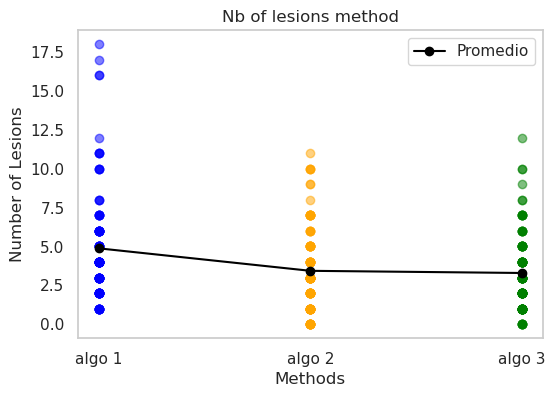

In [186]:
import numpy as np

# Calcular el promedio de p1, p2 y p3 para cada punto de control
promedio_p1 = np.mean(p1)
promedio_p2 = np.mean(p2)
promedio_p3 = np.mean(p3)

plt.figure(figsize=(6, 4))

# Trazar líneas y puntos de dispersión entre los puntos de control
plt.plot(("algo 1", "algo 2", "algo 3"), [promedio_p1, promedio_p2, promedio_p3], label="Promedio", marker='o', color='black')

# Agregar puntos de dispersión para cada conjunto de datos
plt.scatter(["algo 1"] * len(p1), p1, color='blue', alpha=0.5)
plt.scatter(["algo 2"] * len(p2), p2, color='orange', alpha=0.5)
plt.scatter(["algo 3"] * len(p3), p3, color='green', alpha=0.5)

plt.legend(loc="best")
plt.grid()
plt.title("Nb of lesions method")
plt.xlabel("Methods")
plt.ylabel("Number of Lesions")
plt.show()


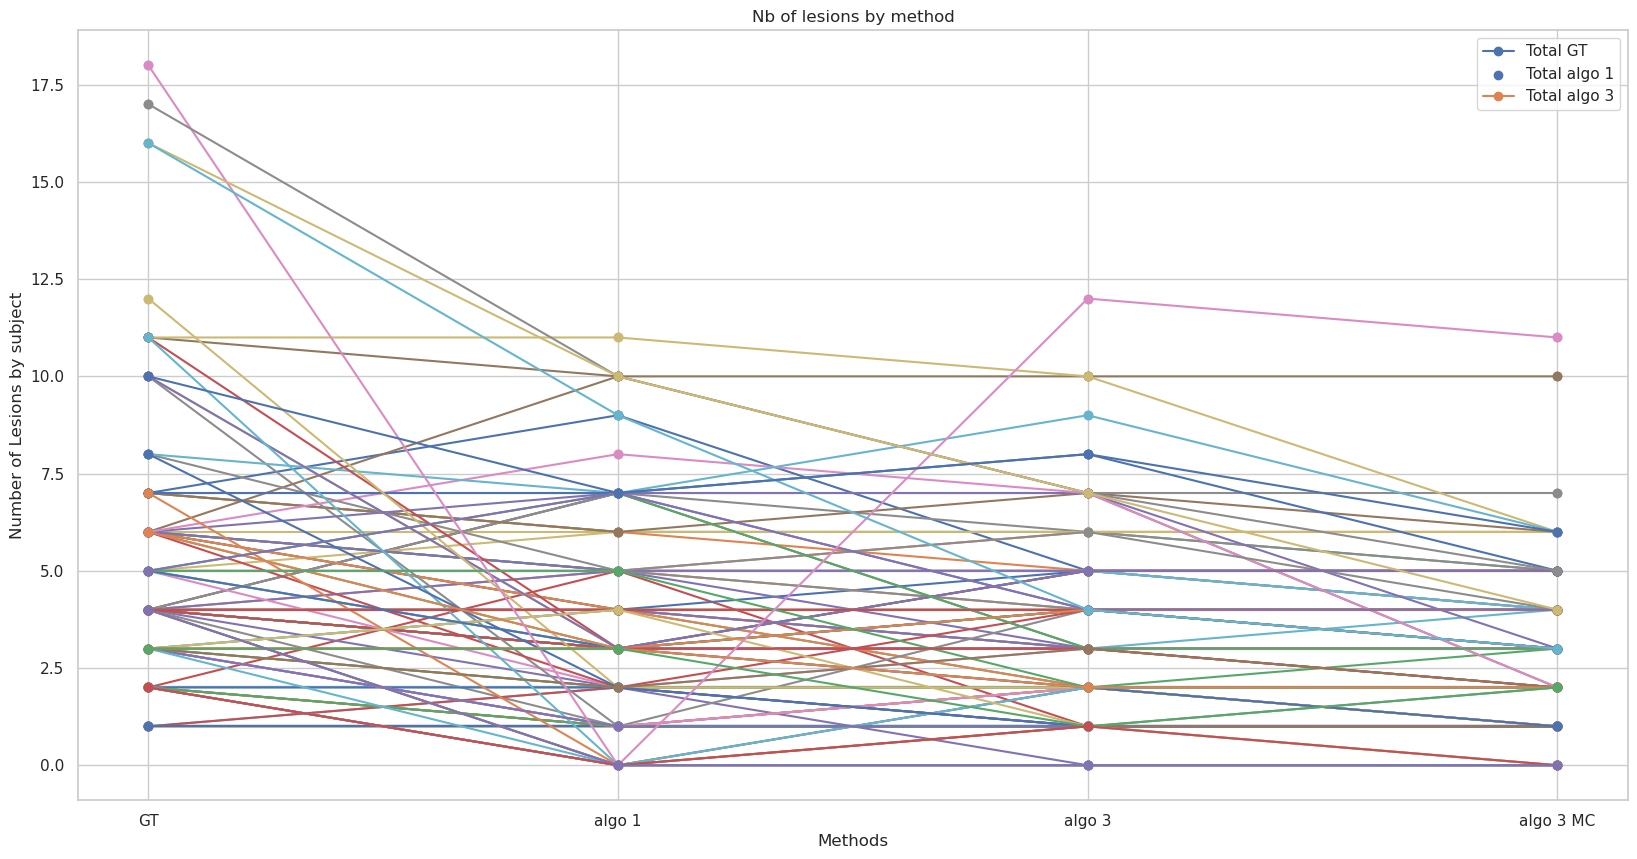

In [178]:
import matplotlib.pyplot as plt

# Suponiendo que p1, p2 y p3 son las listas de valores para cada método.
# Asumiendo que p1, p2 y p3 son listas de igual longitud.

p1 = lesions["Total GT"]
p2 = lesions["Total algo 1"]
p3 = lesions["Total algo 3"]
p4 = lesions["Total algo 3 MC"]

plt.figure(figsize=(20, 10))

# Trazar líneas y puntos de dispersión entre los puntos de control
for pair in zip(p1, p2, p3, p4):
    plt.plot(["GT", "algo 1", "algo 3", "algo 3 MC"], pair, marker='o')
    plt.scatter(["GT", "algo 1", "algo 3", "algo 3 MC"], pair)

plt.legend(["Total GT", "Total algo 1", "Total algo 3"], loc="best")
#plt.grid()
plt.title("Nb of lesions by method")
plt.xlabel("Methods")
plt.ylabel("Number of Lesions by subject")
plt.show()


In [ ]:
path_database  = '/mnt/d/Poly/project_ms_seg/'
data_excel = pd.read_excel(path_database + "3t_metrics_F1_sensitivity_mp2rage.xlsx")

In [18]:
df=[]
path_database  = '/mnt/d/Poly/project_ms_seg/for_dice/'
for subject in subjects: 
    gt_lesion_data= nib.load(path_database + '401/brain_lesion/'+ subject +'_UNIT1_GT.nii.gz')
    gt_lesion = np.array(gt_lesion_data.get_fdata())
    
    pred_lesion_data_algo1 = nib.load(path_database + '401/brain_lesion/'+ subject +'_UNIT1_algo-1.nii.gz')
    pred_lesion_algo1 = np.array(pred_lesion_data_algo1.get_fdata())

    pred_lesion_data_single = nib.load(path_database + '401/brain_lesion/'+ subject +'_UNIT1_algo-3-singleclass.nii.gz')
    pred_lesion_single = np.array(pred_lesion_data_single.get_fdata())

    pred_lesion_data_multi = nib.load(path_database + '401/brain_lesion/'+ subject +'_UNIT1_algo-3-multiclass.nii.gz')
    pred_lesion_multi = np.array(pred_lesion_data_multi.get_fdata())
    
    dice_lesion_algo1 = dice(gt_lesion,pred_lesion_algo1)
    dice_lesion_single = dice(gt_lesion,pred_lesion_single)
    dice_lesion_multi = dice(gt_lesion,pred_lesion_multi)
    
    d = {'subject': subject,'dice_lesion_algo1':dice_lesion_algo1,'dice_lesion_single':dice_lesion_single,
         'dice_lesion_multi':dice_lesion_multi}
    df.append(d)
data=pd.DataFrame(data=df)
data  

/home/nlaines/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,subject,dice_lesion_algo1,dice_lesion_single,dice_lesion_multi
0,sub-C010-ses-M0,NaN,NaN,NaN
1,sub-C012-ses-M0,NaN,NaN,NaN
2,sub-C015-ses-M0,NaN,NaN,NaN
3,sub-MRS00-ses-M0,0.272853,0.635678,0.548431
4,sub-MRS15-ses-M0,0.090409,0.721868,0.656020
...,...,...,...,...
75,sub-P178-ses-M0,0.635838,0.262948,0.173913
76,sub-P183-ses-M0,0.681733,0.550588,0.510309
77,sub-P189-ses-M0,NaN,NaN,NaN
78,sub-P199-ses-M0,0.849968,0.846255,0.799429


In [58]:
min(columna_3[:6])

nan

In [50]:
df=[]
path_database  = '/mnt/d/Poly/region_based/'
data_excel = pd.read_excel(path_database + "metrics_F1_sensitivity_mp2rage.xlsx")
#data_excel

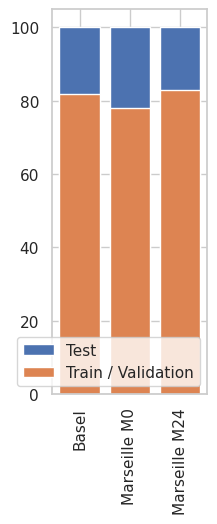

In [215]:
nb_train_cal=141
nb_train_edm=24
nb_train_mon=11

nb_test_cal=39
nb_test_edm=3
nb_test_mon=3


nb_train_cal=67/82*100
nb_test_cal=15/82*100

nb_train_edm=46/59*100
nb_test_edm=13/59*100

nb_train_mon=78/94*100
nb_test_mon=16/94*100


data = pd.DataFrame({'Train_Validation' : [nb_train_cal , nb_train_edm, nb_train_mon],
                     'Test': [ nb_test_cal,nb_test_edm , nb_test_mon]},
                    index=('Basel', 'Marseille M0', 'Marseille M24'))
total = data.sum(axis=1)
plt.figure(figsize=(2,5))
plt.bar(data.index, data.Train_Validation+ data.Test, label='Test')
plt.bar(data.index, data.Train_Validation, label='Train / Validation')
plt.legend(loc='lower right')
plt.xticks(rotation=90)

plt.savefig('color_bar.pdf')
plt.show()

In [205]:
data.Test

Basel            18.292683
Marseille M0     22.033898
Marseille M24    17.021277
Name: Test, dtype: float64

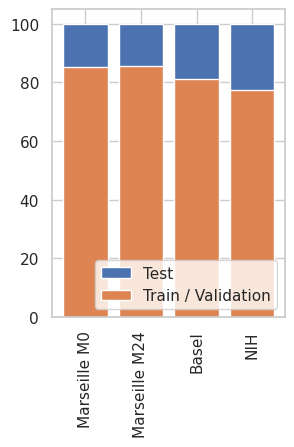

In [225]:
nb_total_m0=27
nb_total_m24=14
nb_total_basel=198
nb_total_nih=163

nb_train_m0=23
nb_train_m24=12
nb_train_basel=161
nb_train_nih=126

nb_test_m0=4
nb_test_m24=2
nb_test_basel=37
nb_test_nih=37

test_m0=nb_train_m0/nb_total_m0 * 100
test_m24=nb_train_m24/nb_total_m24 *100
test_basel=nb_train_basel/nb_total_basel *100
test_nih=nb_train_nih/nb_total_nih *100

train_m0=nb_test_m0/nb_total_m0 *100
train_m24=nb_test_m24/nb_total_m24 *100
train_basel=nb_test_basel/nb_total_basel *100
train_nih=nb_test_nih/nb_total_nih *100


data = pd.DataFrame({'Train_Validation' : [train_m0 , train_m24, train_basel,train_nih ],
                     'Test': [ test_m0, test_m24 , test_basel,test_nih]},
                    index=('Marseille M0', 'Marseille M24', 'Basel', 'NIH'))
total = data.sum(axis=1)
plt.figure(figsize=(3,4))
plt.bar(data.index, data.Test + data.Train_Validation, label='Test')
plt.bar(data.index, data.Test, label='Train / Validation')
plt.legend(loc='lower right')
plt.xticks(rotation=90)

plt.savefig('color_bar.pdf')
plt.show()